# Exploratory data analysis

In [1]:
# https://towardsdatascience.com/exploratory-data-analysis-for-natural-language-processing-ff0046ab3571

In [2]:
# !pip install regex
# !pip install wheel
# !apt-get install python3

In [3]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import collections
import regex as re
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)


from nltk.corpus import stopwords

import pickle

%config InlineBackend.figure_format = 'retina'

In [4]:
pd.set_option('display.max_columns', 10)

In [5]:
df_reddit = pickle.load(open('../DataSet/df_reddit.pkl', 'rb'))
df_reddit.head(2)

,author,created_utc,domain,id,num_comments,over_18,post_hint,score,text_merged,subreddit
0,illichian,1579413305,i.imgur.com,eqsltj,2,False,link,1,star shine saturn ring,NASA
1,itstie,1579412680,i.redd.it,eqsibf,0,False,Empty,1,smithsonian nation air space museum,NASA


In [6]:
df_reddit.shape

(12000, 10)

In [7]:
df_reddit.describe()

,created_utc,num_comments,score
count,1.200000e+04,12000.000000,12000.000000
mean,1.571558e+09,16.340833,78.486417
std,7.064840e+06,113.713599,577.783814
min,1.554121e+09,0.000000,0.000000
25%,1.566498e+09,0.000000,1.000000
50%,1.574287e+09,1.000000,1.000000
75%,1.576985e+09,6.000000,2.000000
max,1.579413e+09,5277.000000,43964.000000


In [8]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
author          12000 non-null object
created_utc     12000 non-null int64
domain          12000 non-null object
id              12000 non-null object
num_comments    12000 non-null int64
over_18         12000 non-null bool
post_hint       12000 non-null object
score           12000 non-null int64
text_merged     12000 non-null object
subreddit       12000 non-null object
dtypes: bool(1), int64(3), object(6)
memory usage: 855.5+ KB


## Exploratory data analysis on data.

* Count the number of words on text and add a new column with number of words.
* Apply sentiment analyzer on each text and add it as a new column.
* seperate the date and add it to data.

In [9]:
# nltk.download('vader_lexicon')
# Mighani Approach:
#Counting the charcaters and word in "text_merged"
#df_reddit["text_char_count"] = df_reddit["text_merged"].map(lambda x: len(x))
df_reddit["word_count*"] = df_reddit["text_merged"].map(lambda x: len(x.split(" ")))

#Sentiment analyzer
sent = SentimentIntensityAnalyzer()

df_reddit['sentiment_score*'] = df_reddit["text_merged"].apply(lambda x: sent.polarity_scores(x)['compound'])

df_reddit['date'] = pd.to_datetime(df_reddit['created_utc'],unit='s')

In [10]:
df_reddit.shape

(12000, 13)

In [11]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
author              12000 non-null object
created_utc         12000 non-null int64
domain              12000 non-null object
id                  12000 non-null object
num_comments        12000 non-null int64
over_18             12000 non-null bool
post_hint           12000 non-null object
score               12000 non-null int64
text_merged         12000 non-null object
subreddit           12000 non-null object
word_count*         12000 non-null int64
sentiment_score*    12000 non-null float64
date                12000 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 1.1+ MB


Lets turn the subreddit column to numerical values.

In [12]:
df_reddit['target'] = df_reddit['subreddit'].replace({"NASA": 1, "Space_discussion": 0})
targets = df_reddit['target']

In [13]:
df_reddit.head(2)

,author,created_utc,domain,id,num_comments,...,subreddit,word_count*,sentiment_score*,date,target
0,illichian,1579413305,i.imgur.com,eqsltj,2,...,NASA,4,0.0,2020-01-19 05:55:05,1
1,itstie,1579412680,i.redd.it,eqsibf,0,...,NASA,5,0.0,2020-01-19 05:44:40,1


Let's check out and see if there is any correlation between different parameters in our df.

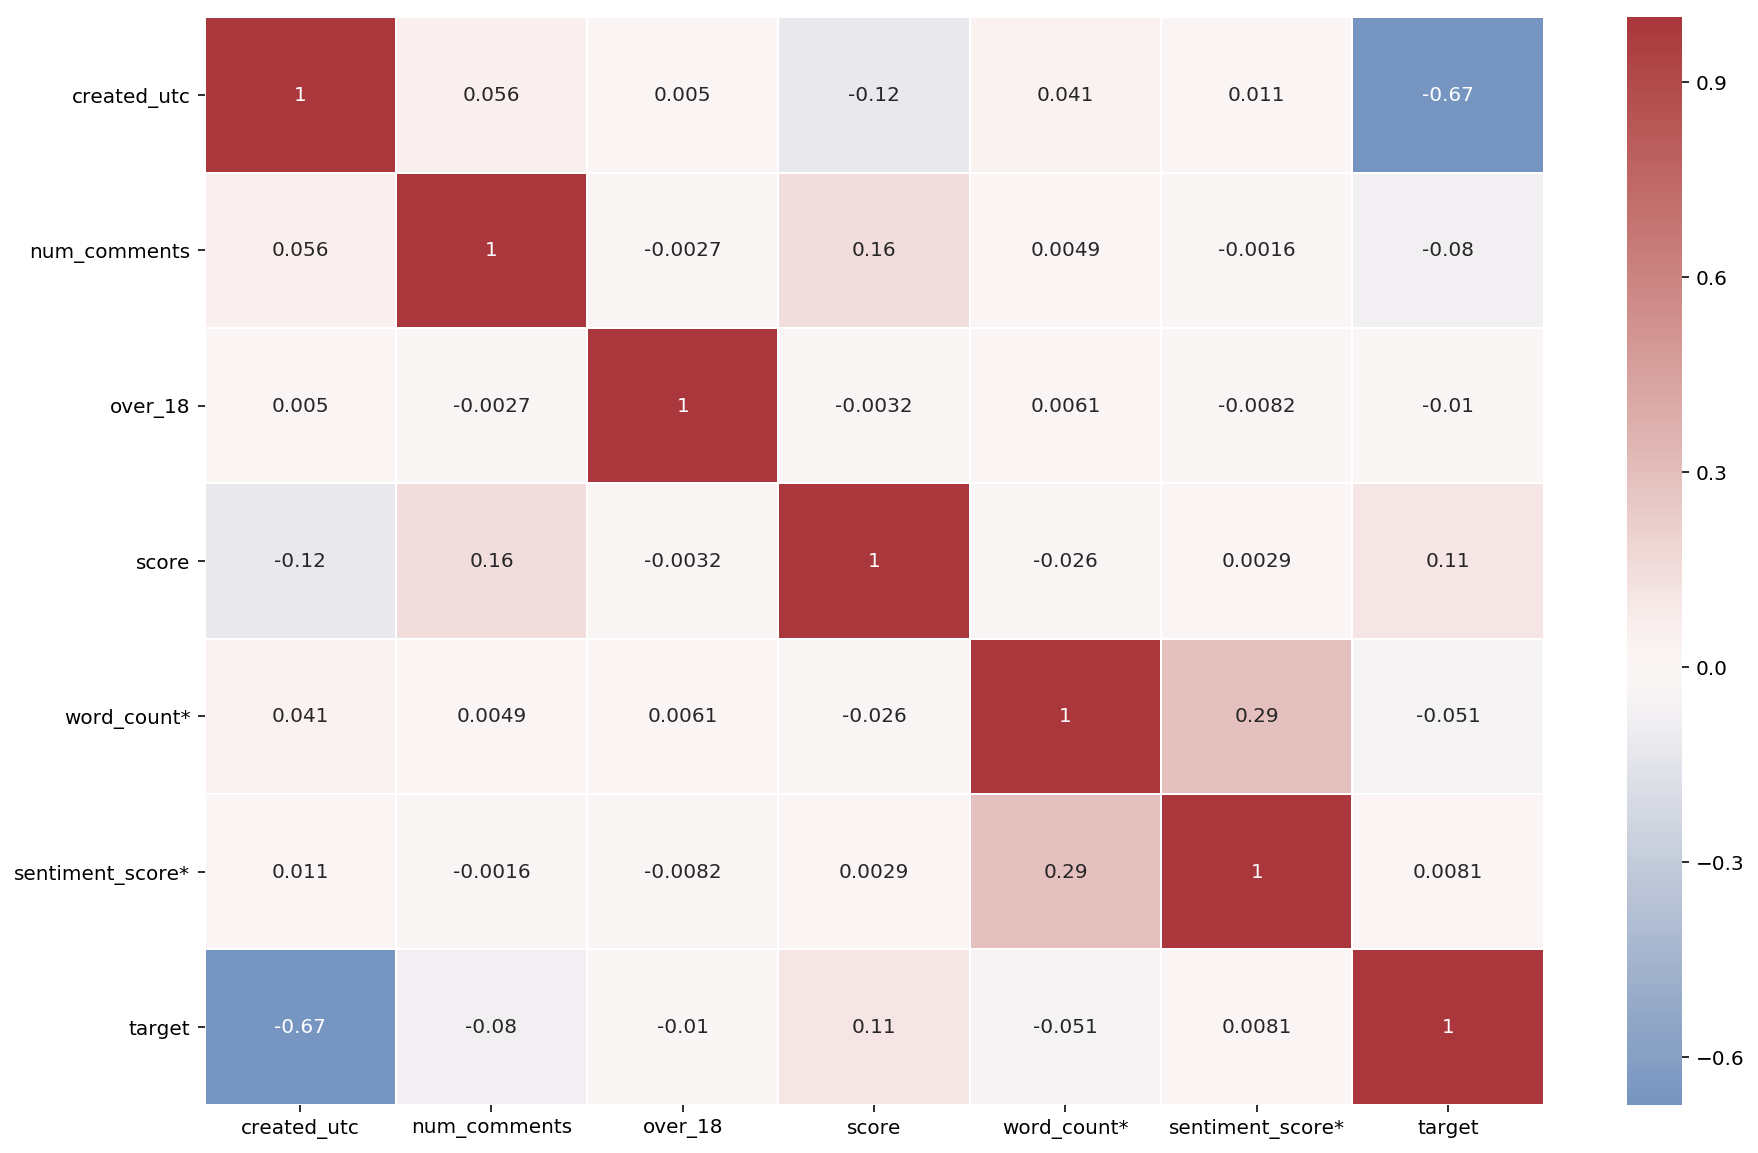

In [14]:
df_reddit_corr = df_reddit.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_reddit_corr, 
            xticklabels=df_reddit_corr.columns,
            yticklabels=df_reddit_corr.columns,
            cmap='vlag',
            annot=True,
            linewidth=0.5, center=0)
plt.savefig("../Figures/plot_03_1.png")

In [15]:
df_reddit.columns

Index(['author', 'created_utc', 'domain', 'id', 'num_comments', 'over_18',
       'post_hint', 'score', 'text_merged', 'subreddit', 'word_count*',
       'sentiment_score*', 'date', 'target'],
      dtype='object')

In [16]:
df_reddit.mean()

created_utc         1.571558e+09
num_comments        1.634083e+01
over_18             5.833333e-04
score               7.848642e+01
word_count*         1.451050e+01
sentiment_score*    1.020900e-01
target              5.000000e-01
dtype: float64

In [17]:
df_reddit.median()

created_utc         1.574287e+09
num_comments        1.000000e+00
over_18             0.000000e+00
score               1.000000e+00
word_count*         8.000000e+00
sentiment_score*    0.000000e+00
target              5.000000e-01
dtype: float64

In [18]:
for col in df_reddit.columns:
    print('\n', len(df_reddit[col].unique()), 'unique {} '.format(str(col)))


 5629 unique author 

 11982 unique created_utc 

 1205 unique domain 

 12000 unique id 

 301 unique num_comments 

 2 unique over_18 

 6 unique post_hint 

 659 unique score 

 10654 unique text_merged 

 2 unique subreddit 

 210 unique word_count* 

 345 unique sentiment_score* 

 11982 unique date 

 2 unique target 


In [19]:
df_reddit['post_hint'].unique()

array(['link', 'Empty', 'image', 'rich:video', 'hosted:video', 'self'],
      dtype=object)

In [20]:
df_reddit['post_hint'].value_counts(normalize=True)

Empty           0.620083
link            0.179917
image           0.107583
rich:video      0.063750
self            0.017417
hosted:video    0.011250
Name: post_hint, dtype: float64

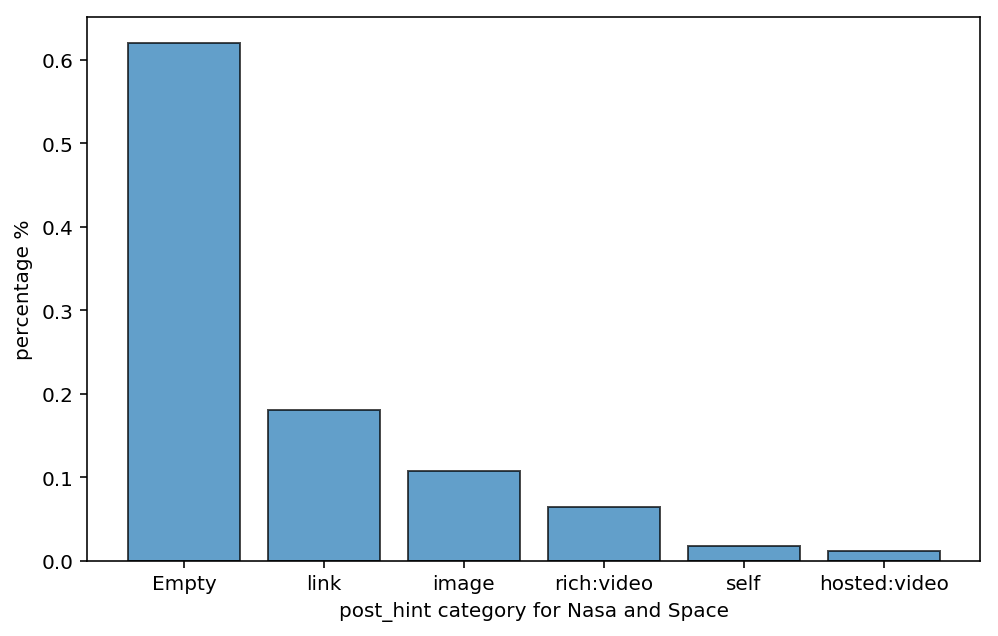

In [21]:
post_hint_percen = pd.DataFrame(df_reddit['post_hint'].value_counts(normalize=True))
# print(post_hint_percen)
plt.figure(figsize=(8,5))
plt.bar(post_hint_percen.index, 
        post_hint_percen['post_hint'],alpha=0.7, ec='k')
plt.xlabel('post_hint category for Nasa and Space'); plt.ylabel('percentage %')
plt.savefig("../Figures/plot_03_2.png")
plt.show()

In [22]:
target_grp = df_reddit.groupby(['target'])

In [23]:
target_grp['post_hint'].value_counts(normalize=True)

target  post_hint   
0       Empty           0.622167
        link            0.191333
        image           0.084833
        rich:video      0.066333
        self            0.022833
        hosted:video    0.012500
1       Empty           0.618000
        link            0.168500
        image           0.130333
        rich:video      0.061167
        self            0.012000
        hosted:video    0.010000
Name: post_hint, dtype: float64

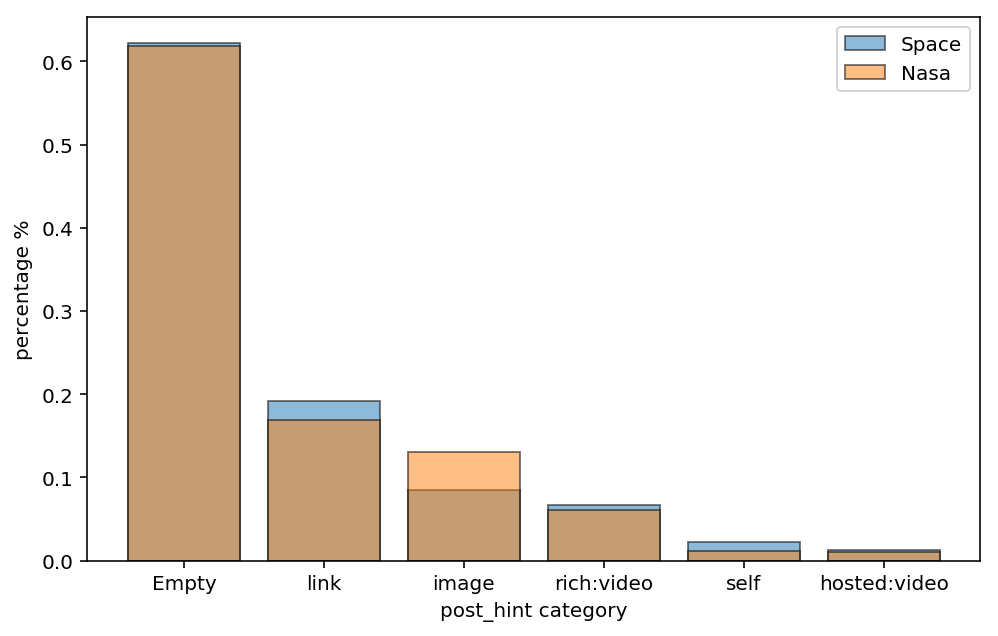

In [24]:
target_grp_post_hint_Space = target_grp['post_hint'].value_counts(normalize=True).loc[0]
target_grp_post_hint_Nasa = target_grp['post_hint'].value_counts(normalize=True).loc[1]


target_grp_post_hint_Space_pd = pd.DataFrame(target_grp['post_hint'].value_counts(normalize=True).loc[0])
target_grp_post_hint_Nasa_pd = pd.DataFrame(target_grp['post_hint'].value_counts(normalize=True).loc[1])

plt.figure(figsize=(8,5))
plt.bar(target_grp_post_hint_Space_pd.index, 
        target_grp_post_hint_Space_pd['post_hint'],
        alpha=0.5, ec='k', label='Space')

plt.bar(target_grp_post_hint_Nasa_pd.index, 
        target_grp_post_hint_Nasa_pd['post_hint'],
        alpha=0.5, ec='k', label='Nasa')

plt.xlabel('post_hint category'); plt.ylabel('percentage %')
plt.legend(loc='top-right')
plt.savefig("../Figures/plot_03_3.png")
plt.show()

##### Observation
It is seen that both categorise are pretty close. The Space has higher percentage of 'link', 'rich:video', and 'self' while Nasa has more 'image' number.

In [25]:
target_grp['over_18'].value_counts(normalize=True)

target  over_18
0       False      0.999167
        True       0.000833
1       False      0.999667
        True       0.000333
Name: over_18, dtype: float64

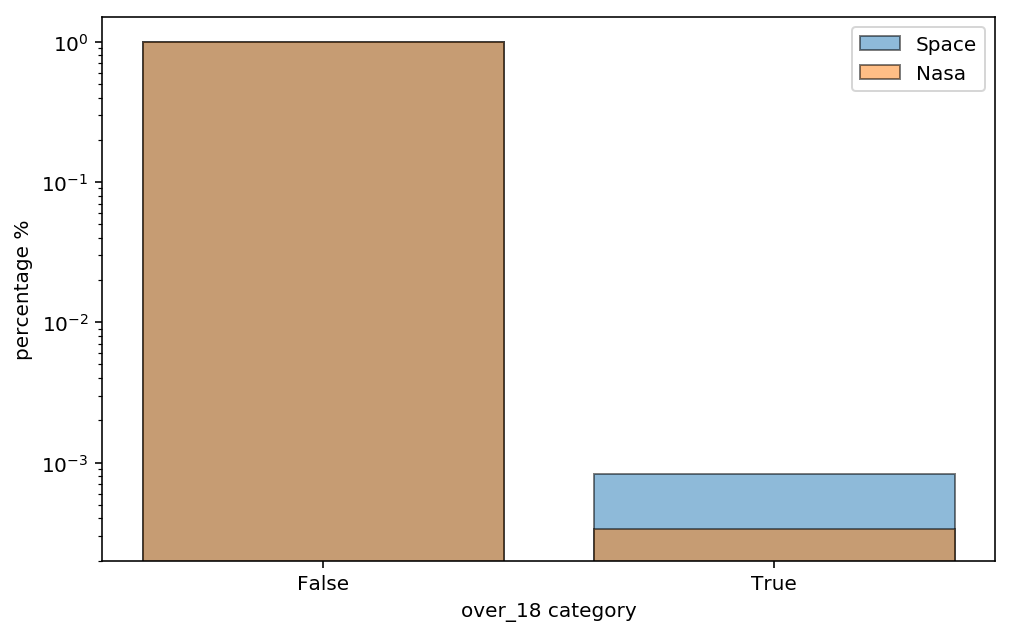

In [26]:
target_grp_over_18_Space = target_grp['over_18'].value_counts(normalize=True).loc[0]
target_grp_over_18_Nasa = target_grp['over_18'].value_counts(normalize=True).loc[1]


target_grp_over_18_Space_pd = pd.DataFrame(target_grp['over_18'].value_counts(normalize=True).loc[0])
target_grp_over_18_Nasa_pd = pd.DataFrame(target_grp['over_18'].value_counts(normalize=True).loc[1])

plt.figure(figsize=(8,5))
plt.bar(['False','True'], 
        target_grp_over_18_Space_pd['over_18'],
        alpha=0.5, ec='k', label='Space', log=True)

plt.bar(['False','True'], 
        target_grp_over_18_Nasa_pd['over_18'],
        alpha=0.5, ec='k', label='Nasa', log=True)

plt.xlabel('over_18 category'); plt.ylabel('percentage %')
plt.legend(loc='top-right')
plt.savefig("../Figures/plot_03_4.png")
plt.show()

##### Observation
Again It is seen that both categorise are pretty close in term of 'over_18'. 
higher number of people in space answered 'False' to the column 'over_18'.

In [27]:
target_grp['word_count*'].value_counts(normalize=False).loc[0].head()

word_count*
4    515
8    505
7    502
6    481
5    444
Name: word_count*, dtype: int64

In [28]:
target_grp['word_count*'].value_counts(normalize=False).loc[1].head()

word_count*
7    563
4    560
3    517
6    514
8    500
Name: word_count*, dtype: int64

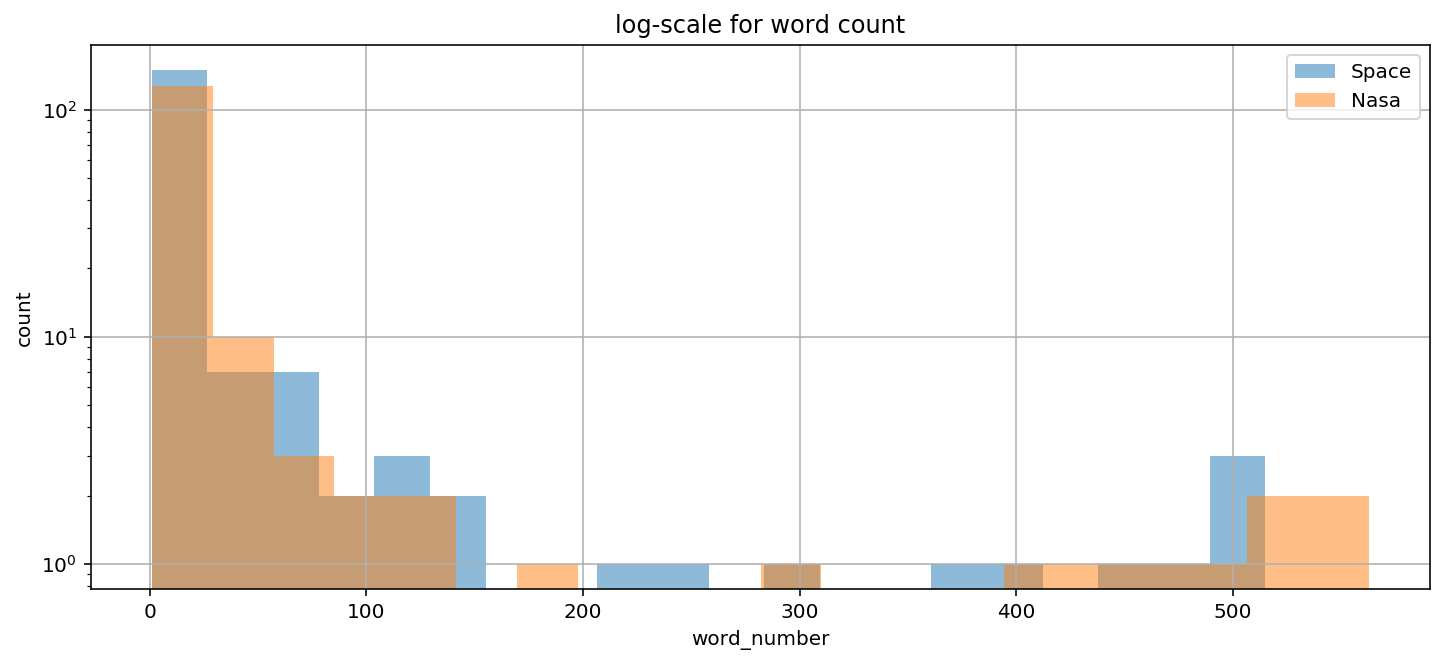

In [29]:
plt.figure(figsize=(12,5))
target_grp['word_count*'].value_counts().loc[0].hist(log=True, alpha=0.5, bins=20, label='Space')
target_grp['word_count*'].value_counts().loc[1].hist(log=True, alpha=0.5, bins=20, label='Nasa')
plt.xlabel('word_number'); plt.ylabel('count');plt.legend(loc='top-right')
plt.title('log-scale for word count')
plt.savefig("../Figures/plot_03_5.png")
plt.show()

In [30]:
# target_grp['word_count*'].agg(['min', 'mean', 'median', 'std', 'max']).T.rename(columns={0:'SPACE', 1:'NASA'})
# target_grp['word_count*'].describe().T.rename(columns={0:'SPACE', 1:'NASA'})

In [31]:
# target_grp['sentiment_score*'].value_counts(normalize=True).loc[0].head()

# target_grp['sentiment_score*'].value_counts(normalize=True).loc[1].head()

# target_grp['sentiment_score*'].value_counts(normalize=True).loc[1].tail()

# plt.figure(figsize=(8,5))
# target_grp['sentiment_score*'].value_counts().loc[0].hist(log=True, alpha=0.5, bins=20, label='Space')
# target_grp['sentiment_score*'].value_counts().loc[1].hist(log=True, alpha=0.5, bins=20, label='Nasa')
# plt.xlabel('sentiment_score'); plt.ylabel('count');plt.legend(loc='top-right')
# plt.title('log-scale for sentiment');plt.show()

In [32]:
print('{} unique post_hint '.format(len(df_reddit['post_hint'].unique())))

6 unique post_hint 


In [33]:
post_hint_grp = df_reddit.groupby(['post_hint'])

In [34]:
post_hint_grp['over_18'].value_counts(normalize=True)

post_hint     over_18
Empty         False      0.999194
              True       0.000806
hosted:video  False      1.000000
image         False      1.000000
link          False      1.000000
rich:video    False      1.000000
self          False      0.995215
              True       0.004785
Name: over_18, dtype: float64

In [35]:
# post_hint_grp['author'].value_counts(normalize=True)

In [36]:
post_hint_grp['author'].value_counts(normalize=True).loc['Empty'].head()

author
NASA_POTD_bot        0.017740
scorpionman          0.016799
Galileos_grandson    0.009945
nostaghian           0.008870
illichian            0.008063
Name: author, dtype: float64

In [37]:
post_hint_grp['author'].value_counts(normalize=True).loc['hosted:video'].head()

author
illichian               0.066667
nostaghian              0.044444
hidenseek2019           0.037037
the_ultimate_salvaje    0.037037
G-rantification         0.022222
Name: author, dtype: float64

Drop the column named domain below to focus just on information from the comments. Word count and sentiment can extract from comments directly.

In [38]:
cols = ['domain', 'author', 'created_utc', 'id', 'num_comments', 'over_18', 'post_hint',
       'score', 'date', 'subreddit']

df_reddit.drop(columns=cols, inplace = True)

In [39]:
df_reddit.head()

,text_merged,word_count*,sentiment_score*,target
0,star shine saturn ring,4,0.0000,1
1,smithsonian nation air space museum,5,0.0000,1
2,incred expand crab nebula,4,0.3182,1
3,columbia readi st,3,0.0000,1
4,went ksc christma got see made interest spacef...,8,0.4588,1


In [40]:
df_reddit.describe().T

,count,mean,std,min,25%,50%,75%,max
word_count*,12000.0,14.51050,31.921244,1.0000,5.0,8.0,13.0000,996.0000
sentiment_score*,12000.0,0.10209,0.303670,-0.9967,0.0,0.0,0.1779,0.9985
target,12000.0,0.50000,0.500021,0.0000,0.0,0.5,1.0000,1.0000


Keep the track of nasa and space_discussion as follow.

In [41]:
sub_nasa_mask = df_reddit["target"] == 1
sub_space_mask = df_reddit["target"] == 0

In [42]:
df_reddit.groupby("target")["word_count*"].describe().T.rename(columns={0:'SPACE',1:'NASA'})

target,SPACE,NASA
count,6000.000000,6000.000000
mean,16.128167,12.892833
std,37.270810,25.372301
min,1.000000,1.000000
25%,5.000000,4.000000
50%,8.000000,7.000000
75%,15.000000,11.000000
max,996.000000,531.000000


##### Observation:
NASA has a lower average word count compare to Space with a smaller standard deviation. let's look at the plt.hist and compare it with space. similar plot provided above but here bar plots are side by side.

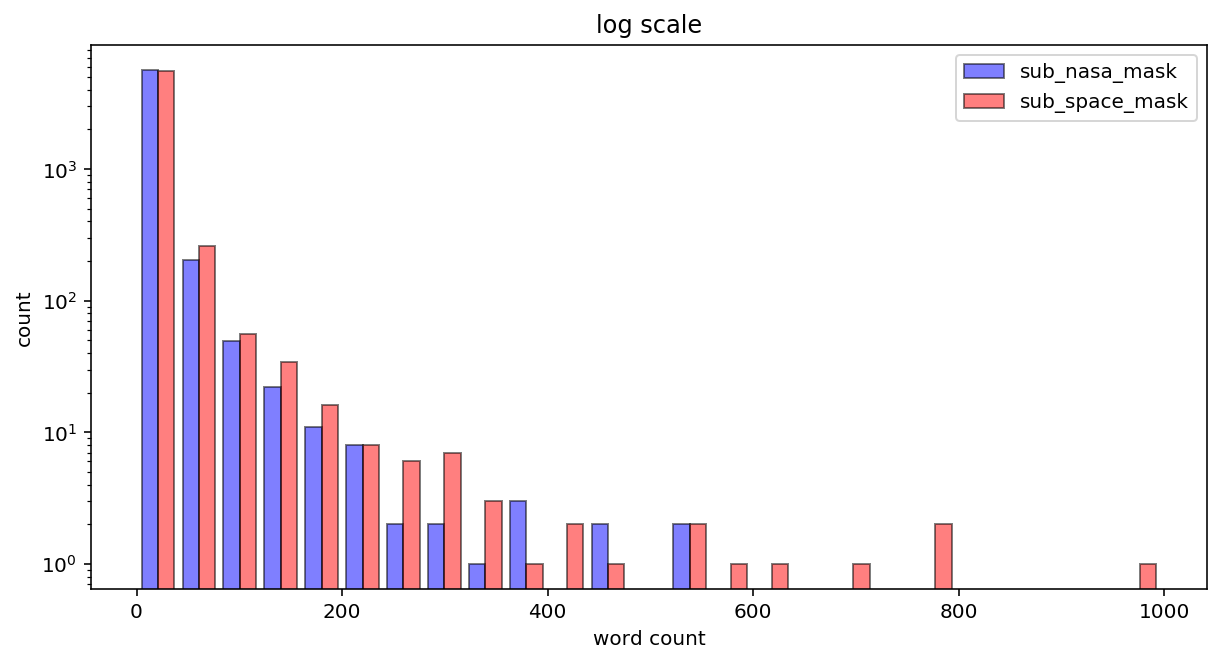

In [43]:
plt.figure(figsize=(10,5))

# plt.subplot(1, 2, 1)
plt.hist([df_reddit[sub_nasa_mask]['word_count*'], 
         df_reddit[sub_space_mask]['word_count*']],
         ec='k', alpha=0.5, bins=25,  color=('b','r'),
         label=['NASA', 'SPACE'], log=True)

plt.xlabel('word count'); plt.ylabel('count')
plt.legend(loc='upper right'), plt.title('log scale')
plt.legend(['sub_nasa_mask', 'sub_space_mask'])


plt.savefig("../Figures/plot_03_6.png")

##### Observation:
It is clear that both subcategories are pretty close in terms of word count. However, the space category has some long texts above 500.

In [44]:
df_reddit.groupby("target")["sentiment_score*"].describe().T.rename(columns={0:'SPACE',1:'NASA'})

target,SPACE,NASA
count,6000.000000,6000.000000
mean,0.099642,0.104538
std,0.313211,0.293824
min,-0.996700,-0.972300
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.226300,0.077200
max,0.998500,0.994000


For the sentiment score, it is seen that both mean and std are pretty close. It seems both SPACE and NASA forums are pretty close! Let's plot both NASA and space.

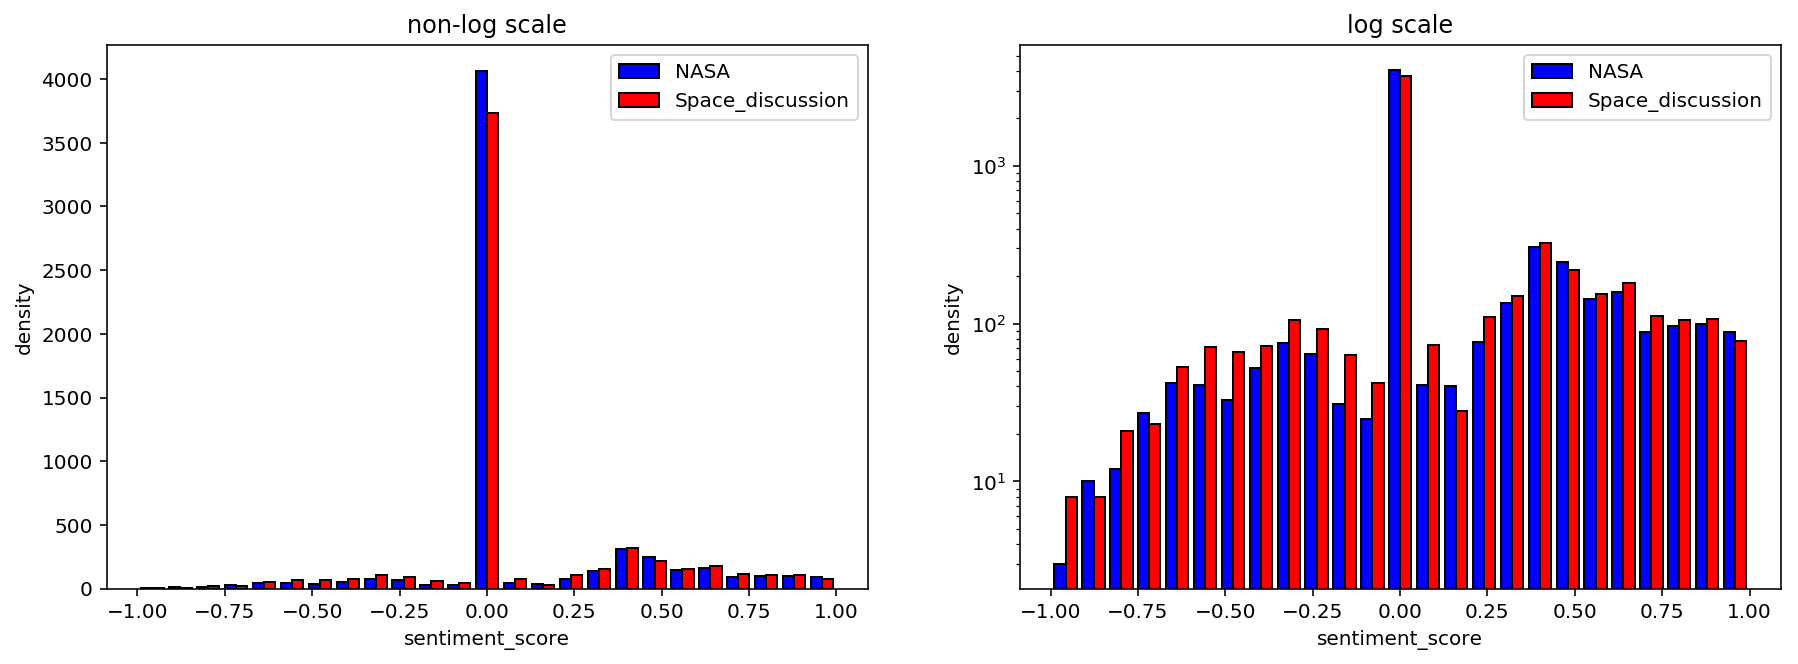

In [45]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist([df_reddit[sub_nasa_mask]['sentiment_score*'], 
          df_reddit[sub_space_mask]['sentiment_score*']],
          bins=25, ec='k', log=False, color=('b','r'))
plt.title('non-log scale', fontsize=12)
plt.legend(['NASA', 'Space_discussion'])
plt.xlabel('sentiment_score'); plt.ylabel('density')


plt.subplot(1, 2, 2)
plt.hist([df_reddit[sub_nasa_mask]['sentiment_score*'], 
          df_reddit[sub_space_mask]['sentiment_score*']],
          bins=25, ec='k', log=True, color=('b','r'))
plt.title('log scale', fontsize=12)
plt.legend(['NASA', 'Space_discussion'])
plt.xlabel('sentiment_score'); plt.ylabel('density')

plt.savefig("../Figures/plot_03_7.png")

##### Observation:
It is seen that the negative sentiment scores for space are a little bit higher than NASA. People who are in NASA discussion have a more positive attitude compared to people who are in space discussion. Let's double check it and do the summation of sentiments for both space and NASA. Also, the Space has more words compare to NASA.

In [46]:
print('sum sentiment_score NASA = ', df_reddit[sub_nasa_mask]['sentiment_score*'].sum())
print('sum sentiment_score SPACE = ', df_reddit[sub_space_mask]['sentiment_score*'].sum())

sum sentiment_score NASA =  627.2271999999999
sum sentiment_score SPACE =  597.8522


In [47]:
print('sum word_count NASA = ', df_reddit[sub_nasa_mask]['word_count*'].sum())
print('sum word_count SPACE = ', df_reddit[sub_space_mask]['word_count*'].sum())

sum word_count NASA =  77357
sum word_count SPACE =  96769


Check out the correlation between current variables.

In [48]:
df_reddit_corr = df_reddit.corr()

In [49]:
df_reddit_corr

,word_count*,sentiment_score*,target
word_count*,1.000000,0.292337,-0.050679
sentiment_score*,0.292337,1.000000,0.008061
target,-0.050679,0.008061,1.000000


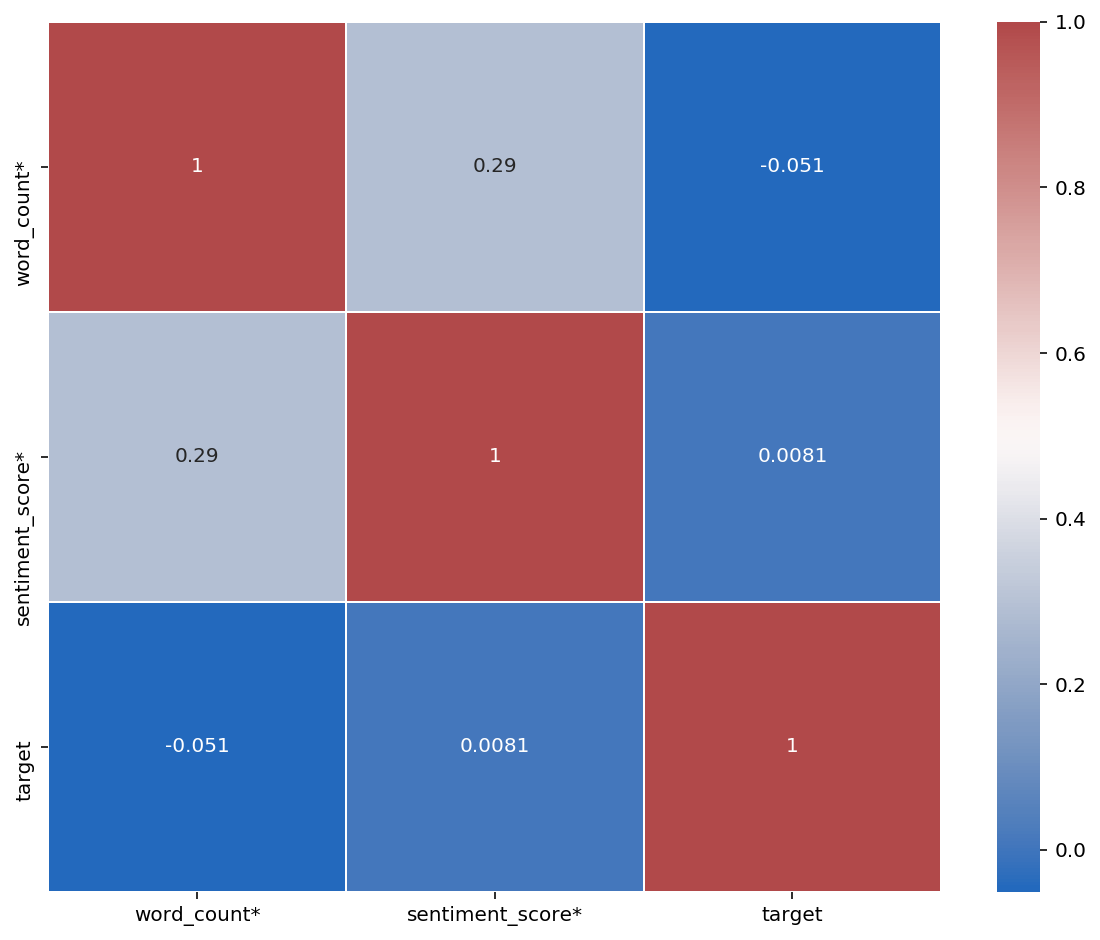

In [50]:
df_reddit_corr = df_reddit.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df_reddit_corr, 
            xticklabels=df_reddit_corr.columns,
            yticklabels=df_reddit_corr.columns,
            cmap='vlag', annot=True, linewidth=0.5, center=0.5)
plt.savefig("../Figures/plot_03_8.png")

## Let's focus on text and do count vectorize on data

Three steps are taken as follows:
* Add some stop words to the general list
* Apply the new list of stop words list (extend)
* Apply count vectorize to the data

### Count vectorizer

In [51]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['http', 'would', 'com']
stopwords.extend(newStopWords)

cvec = CountVectorizer(stop_words=stopwords, min_df=4, max_df=1.0,
                       ngram_range=(1,2))

term_mat = cvec.fit_transform(df_reddit['text_merged'])

print('length of features matrix = ', len(cvec.get_feature_names()))

length of features matrix =  7797


In [52]:
term_df = pd.DataFrame(term_mat.toarray(), 
                       columns=cvec.get_feature_names())
term_df.insert(0, 'targets', targets)
term_df.head(2)

,targets,aa,ab,ab secret,abandon,...,zoom,zoom see,zubrin,zvezda,zvezda servic
0,1,0,0,0,0,...,0,0,0,0,0
1,1,0,0,0,0,...,0,0,0,0,0


Lets see the top words in NASA, SPACE and then see the top overlap words.

In [53]:
top_words_nasa = list(term_df.groupby('targets').
    mean().T.sort_values(1, ascending=False).head(20).index)

top_words_space_dis = list(term_df.groupby('targets').
    mean().T.sort_values(0, ascending=False).head(20).index)

top_words_overlap = [word for word in top_words_space_dis if word in top_words_nasa]

In [54]:
print('top_words_nasa\n\n', top_words_nasa,
      '\n\ntop_words_space_dis\n\n', top_words_space_dis,
      '\n\ntop_words_overlap\n\n', top_words_overlap)

top_words_nasa

 ['nasa', 'space', 'moon', 'apollo', 'earth', 'astronaut', 'mission', 'mar', 'year', 'launch', 'work', 'like', 'one', 'first', 'get', 'new', 'amp', 'time', 'go', 'station'] 

top_words_space_dis

 ['space', 'earth', 'nasa', 'moon', 'time', 'amp', 'star', 'year', 'planet', 'like', 'mar', 'launch', 'univers', 'could', 'new', 'hole', 'first', 'black', 'one', 'black hole'] 

top_words_overlap

 ['space', 'earth', 'nasa', 'moon', 'time', 'amp', 'year', 'like', 'mar', 'launch', 'new', 'first', 'one']


##### Observation:
As it is seen these two topics are very close! The top words for NASA are space, earth, NASA, moon which have three out of four similar to space. 

In [55]:
top_words_space_notin_nasa = [word for word in top_words_space_dis if word not in top_words_nasa]
print('top_words_space_not_in_nasa\n\n', top_words_space_notin_nasa)

top_words_space_not_in_nasa

 ['star', 'planet', 'univers', 'could', 'hole', 'black', 'black hole']


In [56]:
top_words_nasa_notin_space = [word for word in top_words_nasa if word not in top_words_space_dis]
print('top_words_nasa_not_in_space\n\n', top_words_nasa_notin_space)

top_words_nasa_not_in_space

 ['apollo', 'astronaut', 'mission', 'work', 'get', 'go', 'station']


### Number of characters present in each sentence

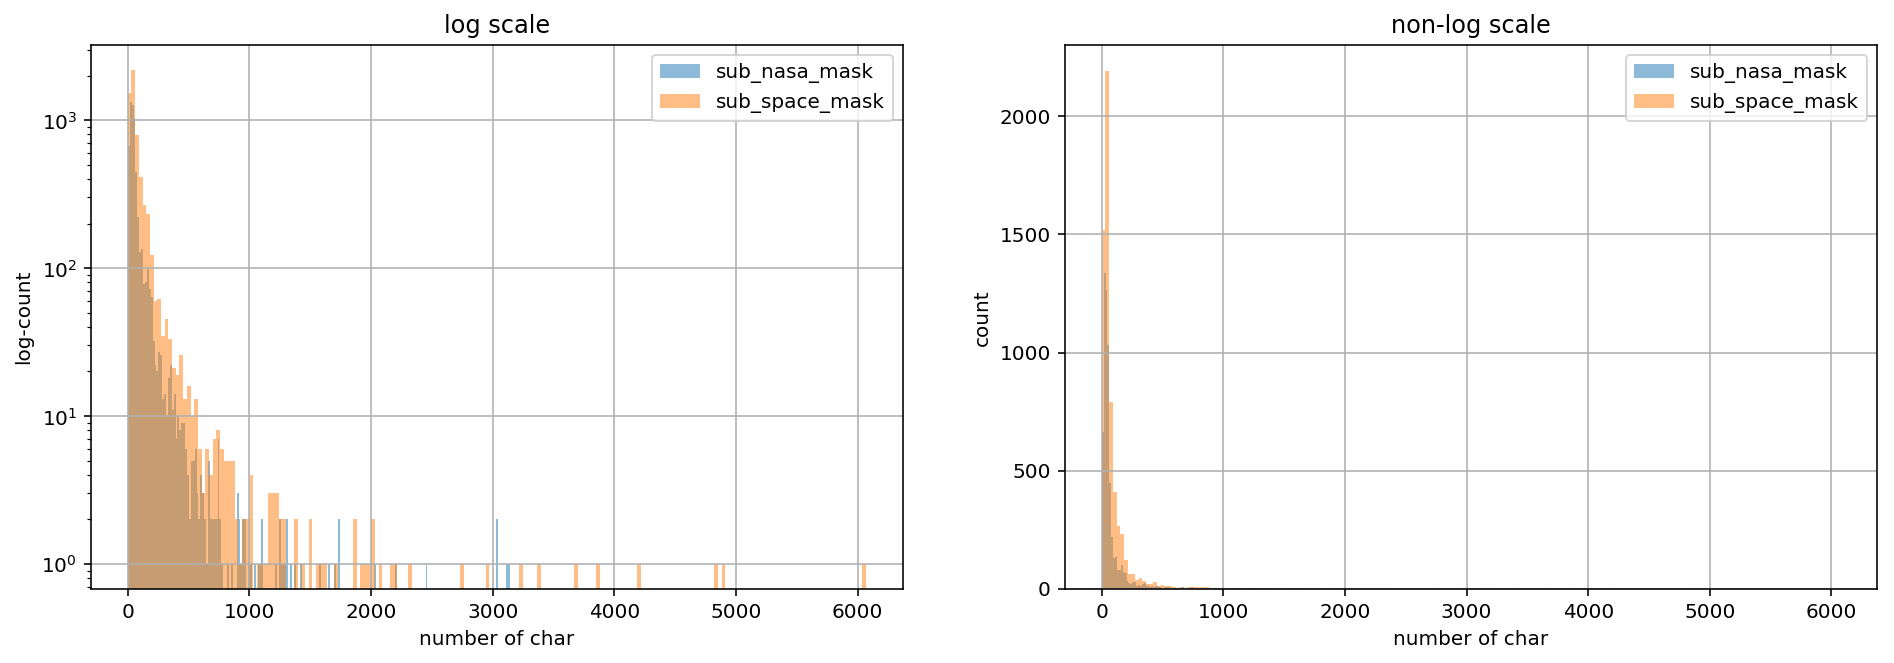

In [57]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
df_reddit[sub_nasa_mask]['text_merged'].str.len().hist(bins=200, log=True, alpha=0.5, label='sub_nasa_mask')
df_reddit[sub_space_mask]['text_merged'].str.len().hist(bins=200, log=True, alpha=0.5, label='sub_space_mask')
plt.xlabel('number of char'); plt.ylabel('log-count')
plt.legend(loc='upper right'), plt.title('log scale')

plt.subplot(1, 2, 2)
df_reddit[sub_nasa_mask]['text_merged'].str.len().hist(bins=200, log=False, alpha=0.5, label='sub_nasa_mask')
df_reddit[sub_space_mask]['text_merged'].str.len().hist(bins=200, log=False, alpha=0.5, label='sub_space_mask')
plt.xlabel('number of char'); plt.ylabel('count')
plt.legend(loc='upper right'), plt.title('non-log scale')
plt.savefig("../Figures/plot_03_9.png")

### Average word length in each sentence

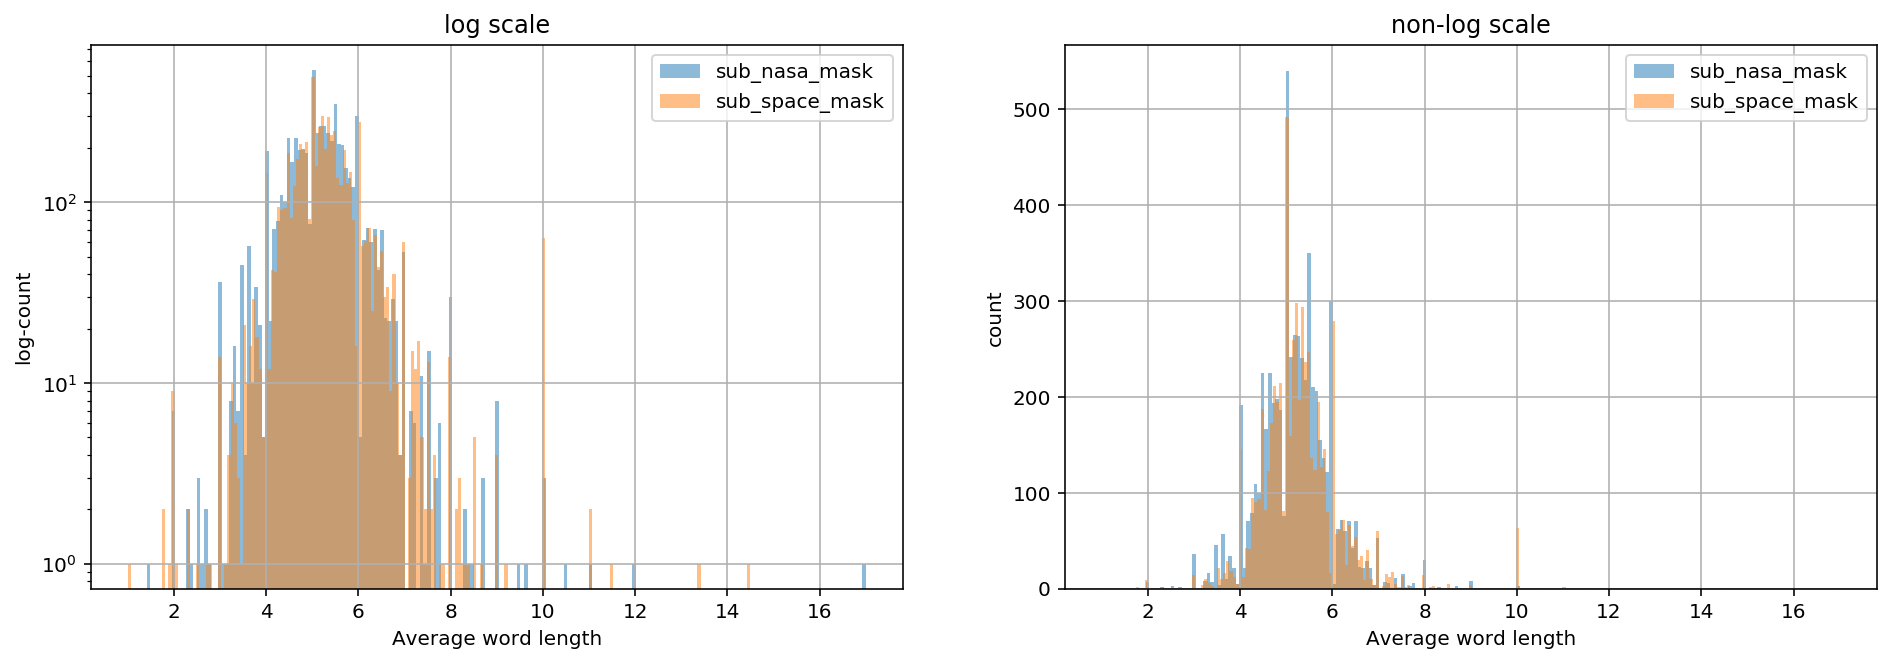

In [58]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
df_reddit[sub_nasa_mask]['text_merged'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=200, log=True, alpha=0.5, label='sub_nasa_mask')

df_reddit[sub_space_mask]['text_merged'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=200, log=True, alpha=0.5, label='sub_space_mask')
plt.xlabel('Average word length'); plt.ylabel('log-count')
plt.legend(loc='upper right'), plt.title('log scale')

plt.subplot(1, 2, 2)
df_reddit[sub_nasa_mask]['text_merged'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=200, log=False, alpha=0.5, label='sub_nasa_mask')

df_reddit[sub_space_mask]['text_merged'].str.split().apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist(bins=200, log=False, alpha=0.5, label='sub_space_mask')
plt.xlabel('Average word length'); plt.ylabel('count')
plt.legend(loc='upper right'), plt.title('non-log scale')
plt.savefig("../Figures/plot_03_10.png")

Again both topics are pretty close in term of average word length and number fo characters.

### Inspect which words other than stopwords occur frequently

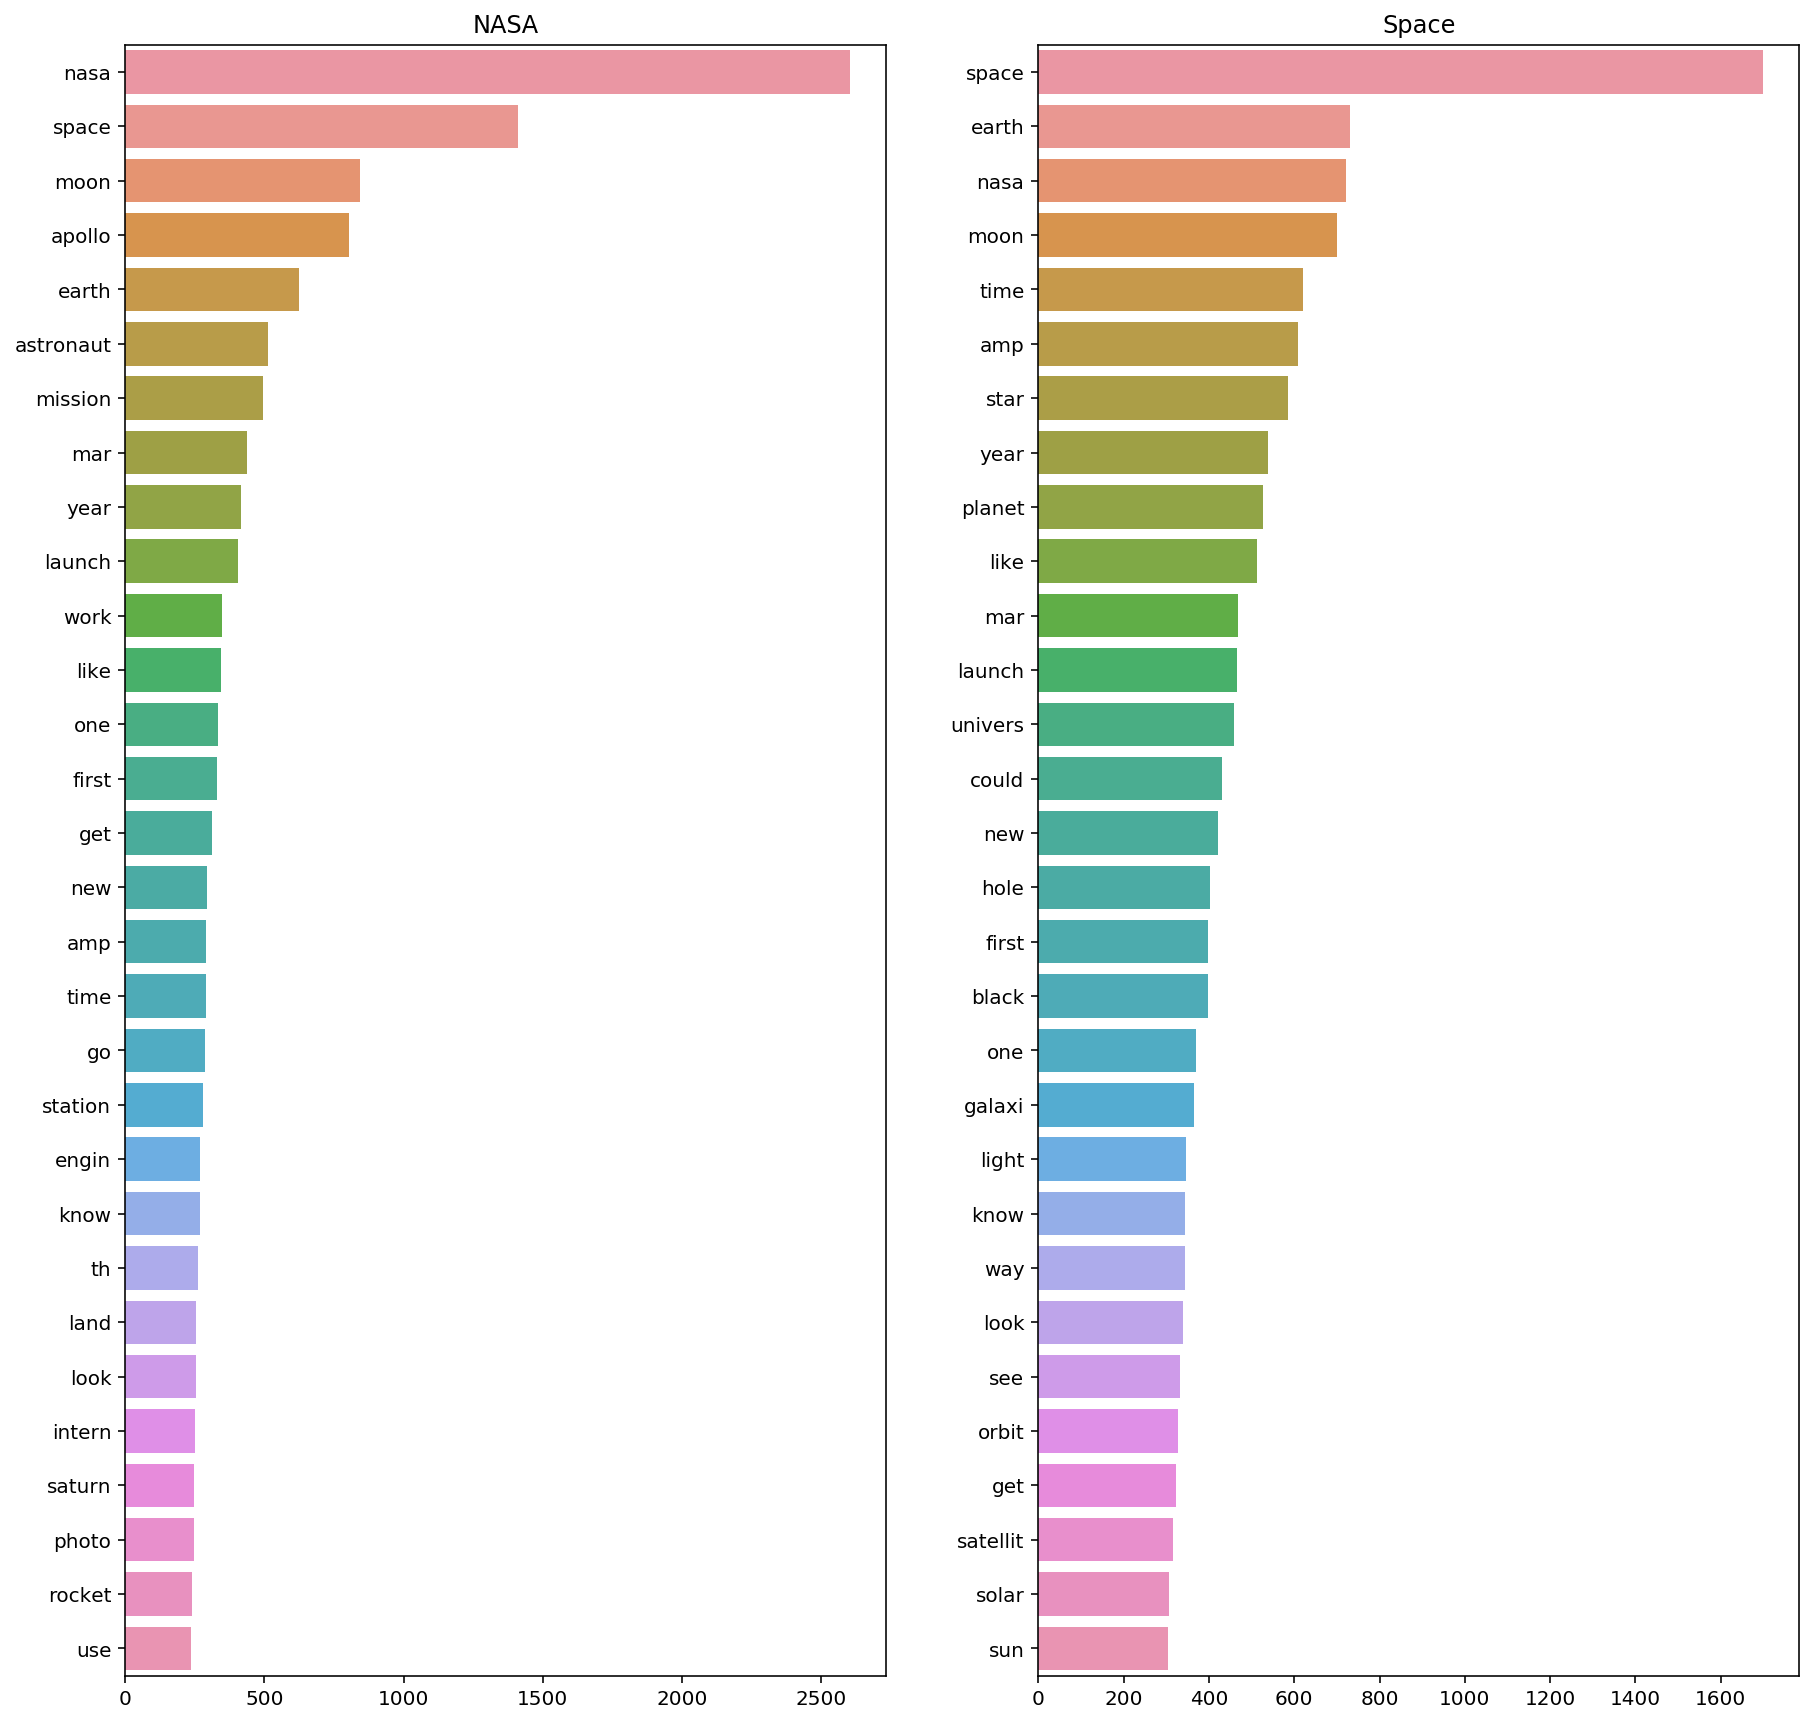

In [59]:
plt.figure(figsize=(15,15))


corpus=[]
new= df_reddit[sub_nasa_mask]['text_merged'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1


# plt.figure(figsize=(10,5))
counter=collections.Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:30]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
plt.subplot(1, 2, 1)  
a = sns.barplot(x=y,y=x, label='sub_nasa_mask')
plt.title('NASA')


corpus=[]
new= df_reddit[sub_space_mask]['text_merged'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1


# plt.figure(figsize=(10,5))
counter=collections.Counter(corpus)
most=counter.most_common()
x, y= [], []
for word,count in most[:30]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
plt.subplot(1, 2, 2) 
a = sns.barplot(x=y,y=x, label='sub_space_mask')
plt.title('Space')
plt.savefig("../Figures/plot_03_11.png")

As it is seen the nasa, space, moon and earth are top words in comments.

### Looking at most frequent n-grams can give you a better understanding of the context 

In [60]:
from nltk.util import ngrams

### Bigrams

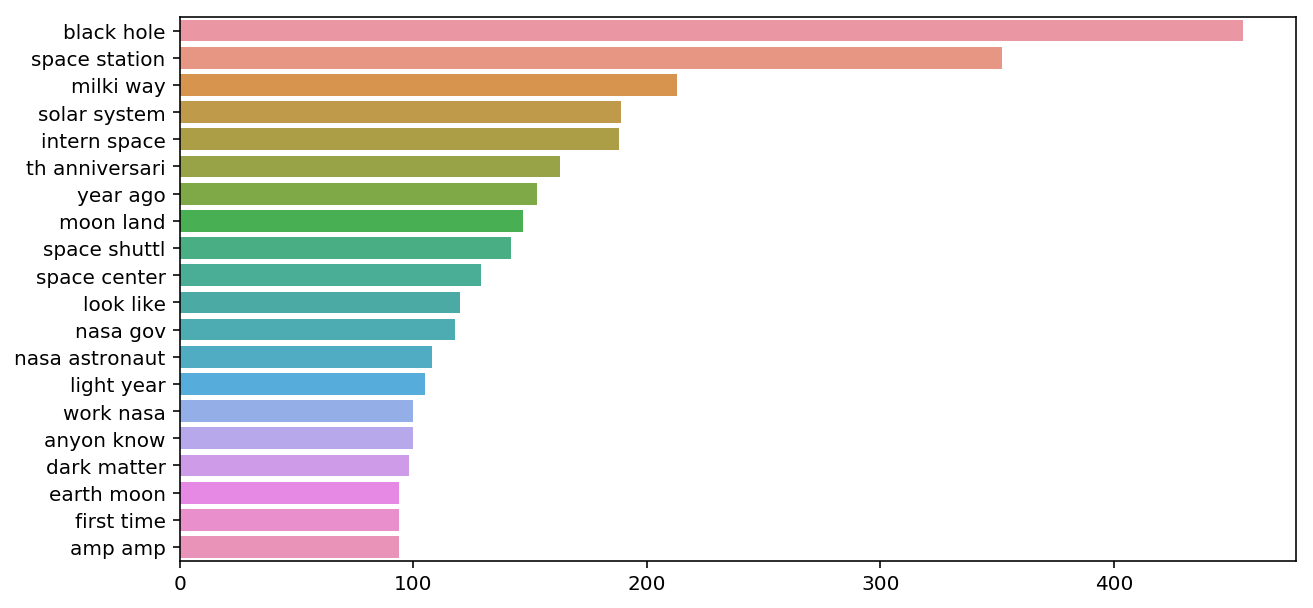

In [61]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]

top_n_bigrams=get_top_ngram(df_reddit['text_merged'],2)[:20]
x,y=map(list,zip(*top_n_bigrams))
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x)
plt.savefig("../Figures/plot_03_12.png")

### Trigrams

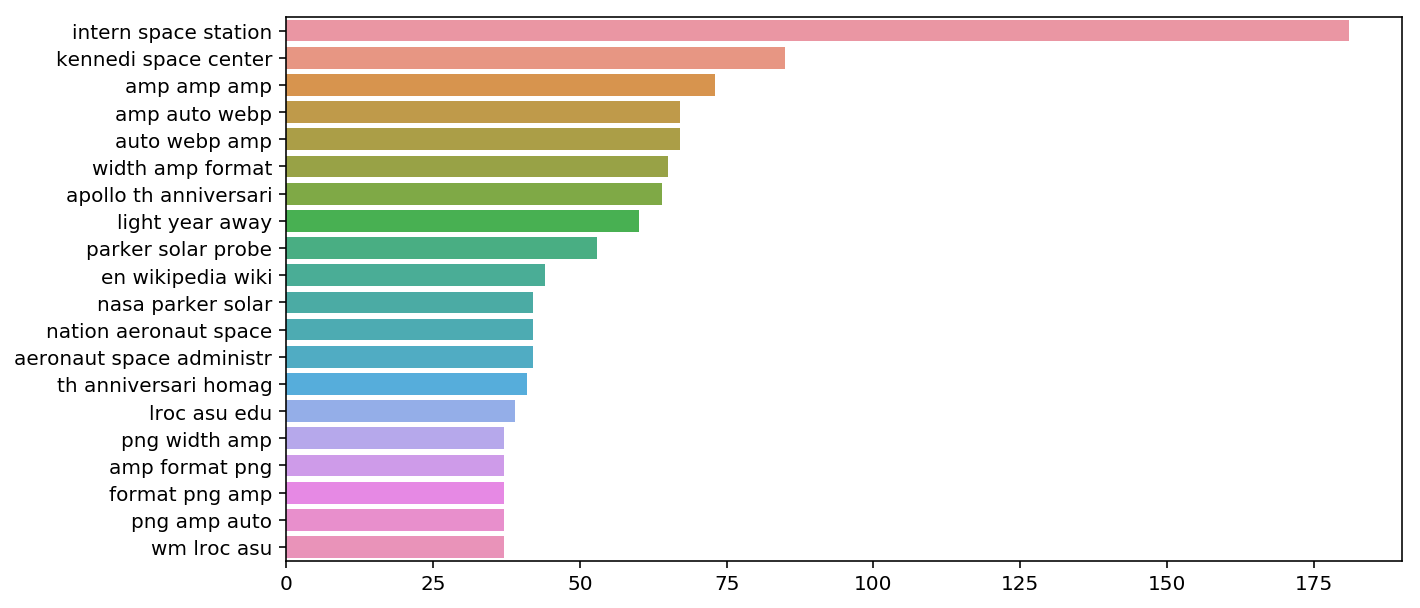

In [62]:
top_tri_grams=get_top_ngram(df_reddit['text_merged'],n=3)
x,y=map(list,zip(*top_tri_grams))
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x)
plt.savefig("../Figures/plot_03_13.png")

### Topic Modeling exploration with pyLDAvis

This is unsupervised modeling. let's see what AI will see inside our data frame.

In [63]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df_reddit['text_merged']:
        words=[w for w in word_tokenize(news) if (w not in stopwords)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus
corpus=preprocess_news(df_reddit)

[nltk_data] Downloading package punkt to /Users/amin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/amin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [64]:
# !python -m pip install -U gensim

In [65]:
from gensim import models
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [66]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 2, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.011*"earth" + 0.010*"nasa" + 0.007*"time" + 0.007*"star" + 0.007*"moon" + 0.007*"space" + 0.007*"like" + 0.007*"planet" + 0.006*"mar" + 0.005*"could"'),
 (1,
  '0.034*"space" + 0.026*"nasa" + 0.012*"amp" + 0.012*"apollo" + 0.010*"moon" + 0.009*"astronaut" + 0.009*"mission" + 0.006*"hole" + 0.006*"black" + 0.006*"new"')]

##### Observation
The unsupervised correctly detect two main subjects as we expected (high coffs for NASA and Space). NASA and Space!

In [67]:
# !python -m pip install -U pyLDAvis
# !/Users/amin/anaconda3/bin/python3 -m pip install pyLDAvis

In [68]:
# import pyLDAvis
# import pyLDAvis.gensim
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
# vis

### Wordcloud

In [69]:
# import sys
# print(sys.executable)

In [70]:
# !/Users/amin/anaconda3/bin/python -m pip install wordcloud

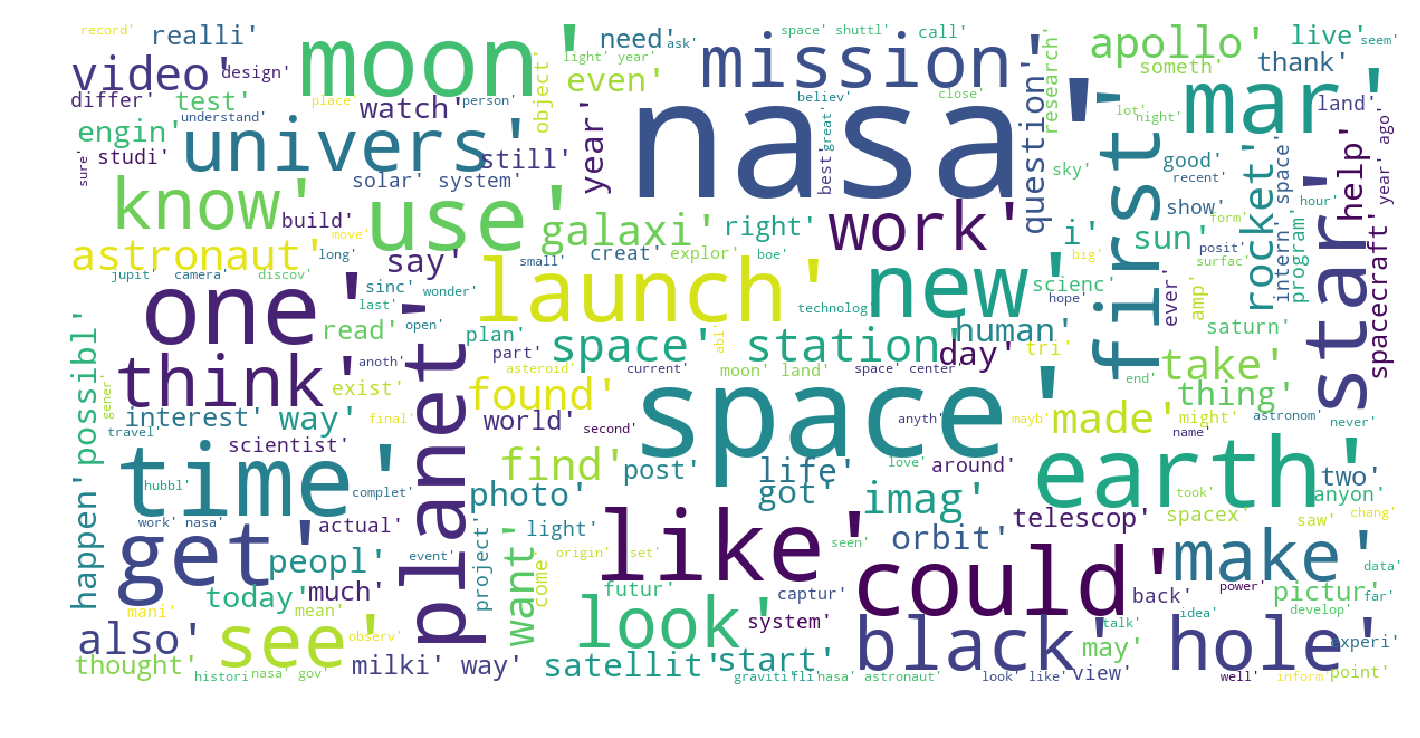

In [71]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=50,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))
    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
#     plt.show()
    
show_wordcloud(corpus)
plt.savefig("../Figures/plot_03_14.png")

### Textblob

In [72]:
# !/Users/amin/anaconda3/bin/python -m pip install textblob

In [73]:
from textblob import TextBlob

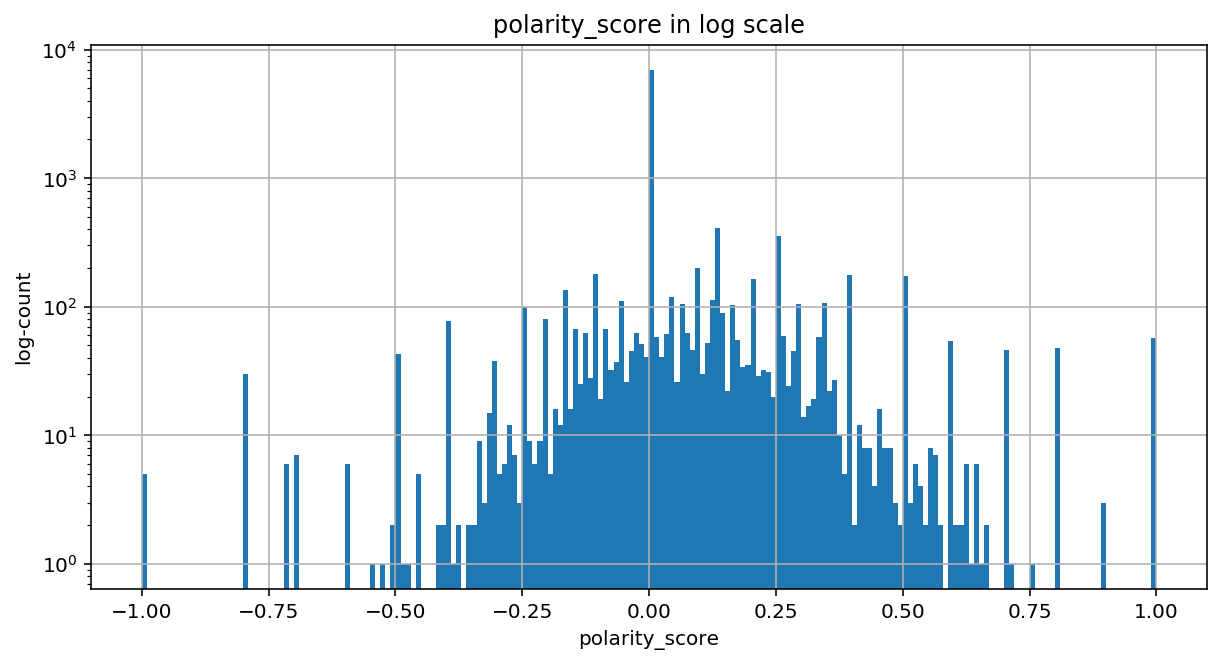

In [74]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df_reddit['polarity_score']=df_reddit['text_merged'].apply(lambda x : polarity(x))

plt.figure(figsize=(10,5))
df_reddit['polarity_score'].hist(bins=200, log=True)

plt.xlabel('polarity_score'); 
plt.ylabel('log-count')
plt.title('polarity_score in log scale')
plt.savefig("../Figures/plot_03_15.png")

In [75]:
df_reddit.head()

,text_merged,word_count*,sentiment_score*,target,polarity_score
0,star shine saturn ring,4,0.0000,1,0.0
1,smithsonian nation air space museum,5,0.0000,1,0.0
2,incred expand crab nebula,4,0.3182,1,0.0
3,columbia readi st,3,0.0000,1,0.0
4,went ksc christma got see made interest spacef...,8,0.4588,1,0.0


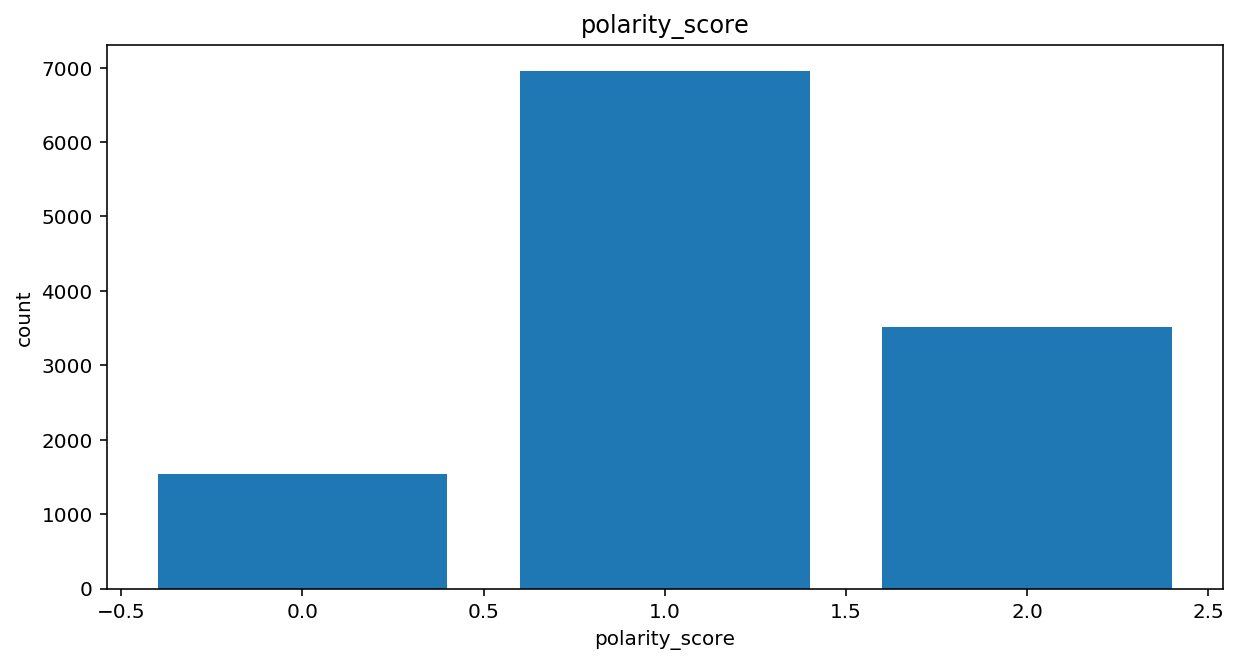

In [76]:
def sentiment(x):
    if x<0:
        return 0
    elif x==0:
        return 1
    else:
        return 2
    
df_reddit['polarity']=df_reddit['polarity_score'].map(lambda x: sentiment(x))

plt.figure(figsize=(10,5))

plt.bar(df_reddit.polarity.value_counts().index,
        df_reddit.polarity.value_counts())

plt.xlabel('polarity_score'); 
plt.ylabel('count')
plt.title('polarity_score')
plt.savefig("../Figures/plot_03_16.png")

In [77]:
df_reddit.head()

,text_merged,word_count*,sentiment_score*,target,polarity_score,polarity
0,star shine saturn ring,4,0.0000,1,0.0,1
1,smithsonian nation air space museum,5,0.0000,1,0.0,1
2,incred expand crab nebula,4,0.3182,1,0.0,1
3,columbia readi st,3,0.0000,1,0.0,1
4,went ksc christma got see made interest spacef...,8,0.4588,1,0.0,1


In [78]:
# df_reddit['polarity'] = df_reddit['polarity'].replace({"neu": 2, "pos": 3, "neg": 1})

In [79]:
df_reddit.head()

,text_merged,word_count*,sentiment_score*,target,polarity_score,polarity
0,star shine saturn ring,4,0.0000,1,0.0,1
1,smithsonian nation air space museum,5,0.0000,1,0.0,1
2,incred expand crab nebula,4,0.3182,1,0.0,1
3,columbia readi st,3,0.0000,1,0.0,1
4,went ksc christma got see made interest spacef...,8,0.4588,1,0.0,1


In [80]:
df_reddit.describe().T

,count,mean,std,min,25%,50%,75%,max
word_count*,12000.0,14.510500,31.921244,1.0000,5.0,8.0,13.000000,996.0000
sentiment_score*,12000.0,0.102090,0.303670,-0.9967,0.0,0.0,0.177900,0.9985
target,12000.0,0.500000,0.500021,0.0000,0.0,0.5,1.000000,1.0000
polarity_score,12000.0,0.049904,0.184337,-1.0000,0.0,0.0,0.083333,1.0000
polarity,12000.0,1.164667,0.627097,0.0000,1.0,1.0,2.000000,2.0000


In [81]:
df_reddit.corr().T

,word_count*,sentiment_score*,target,polarity_score,polarity
word_count*,1.000000,0.292337,-0.050679,0.053004,0.105941
sentiment_score*,0.292337,1.000000,0.008061,0.414946,0.333992
target,-0.050679,0.008061,1.000000,-0.011361,-0.009568
polarity_score,0.053004,0.414946,-0.011361,1.000000,0.757983
polarity,0.105941,0.333992,-0.009568,0.757983,1.000000


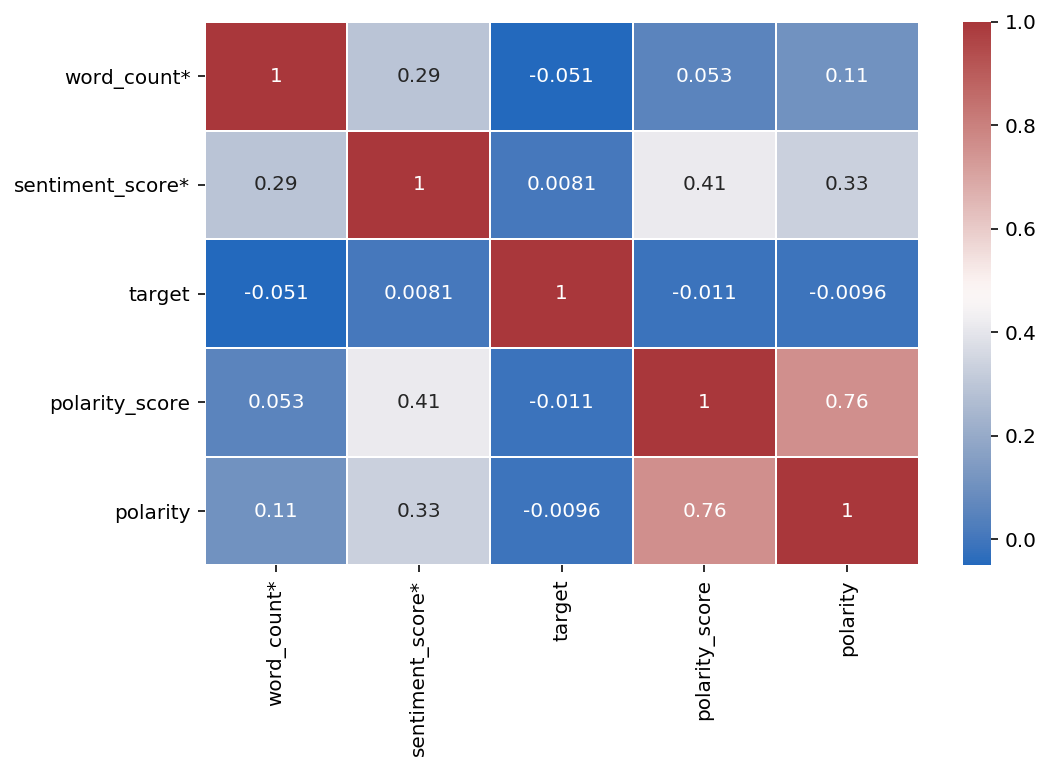

In [82]:
df_reddit_corr = df_reddit.corr()
plt.figure(figsize=(8,5))
sns.heatmap(df_reddit_corr, 
            xticklabels=df_reddit_corr.columns,
            yticklabels=df_reddit_corr.columns,
            cmap='vlag',
            annot=True,
            linewidth=0.5)
plt.savefig("../Figures/plot_03_17.png")

Let's check out some of the positive and negative sentences.

In [83]:
df_reddit[df_reddit['polarity']==2]['text_merged'].head()

7     nasa expect detail cost fast track moon land p...
13    exit door amp c astronaut leav board astrovan ...
18    nasa new space tradit dazzl astronaut graduat ...
29                            nasa super musculair mice
34                  fun fact could drive bu stripe flag
Name: text_merged, dtype: object

In [84]:
df_reddit[df_reddit['polarity']==0]['text_merged'].head()

8                      went john f kennedi space center
10              x flight part one x plane everyday seri
17    hi could pleas tell black object seem follow i...
24    went kennedi space center birthday got beauti ...
44    hey nasa cloud custom help help onsit intervie...
Name: text_merged, dtype: object

### Vader Sentiment Analysis

Vader works better in detecting negative sentiment.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/amin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


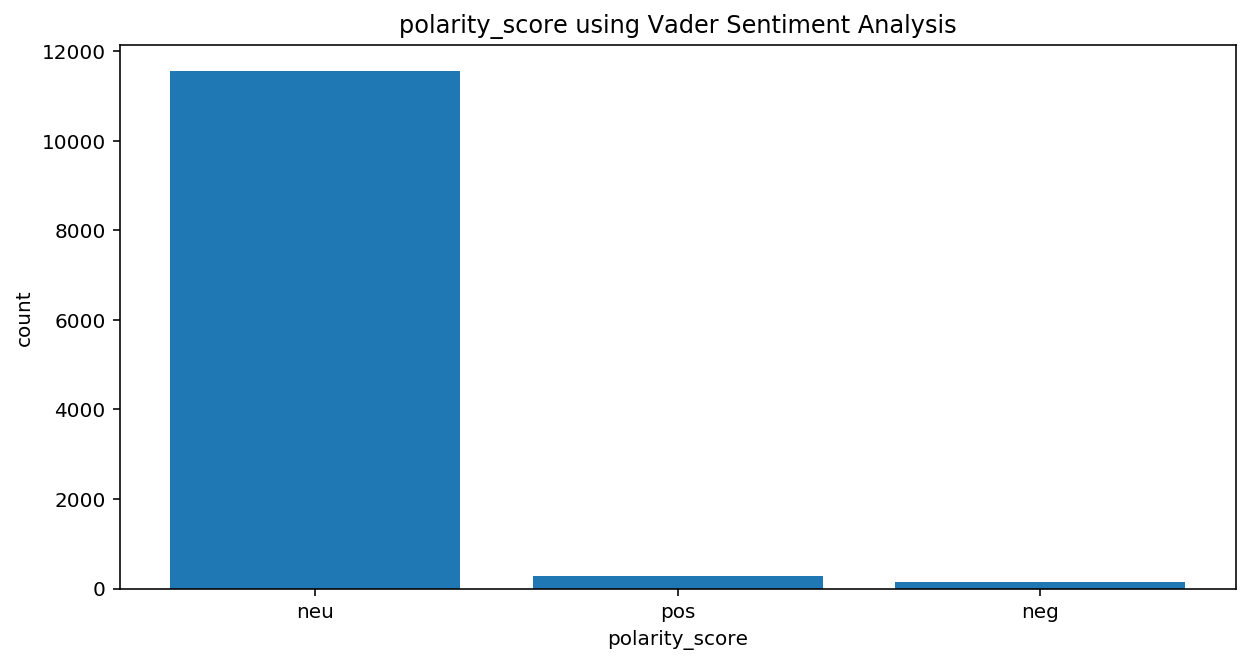

In [85]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])


df_reddit['polarity']=df_reddit['text_merged'].map(lambda x: get_vader_score(x))

polarity=df_reddit['polarity'].replace({0:'neg',1:'neu',2:'pos'})
df_reddit['polarity_VSA']=df_reddit['polarity'].replace({0:'neg',1:'neu',2:'pos'})
plt.figure(figsize=(10,5))
plt.bar(polarity.value_counts().index,polarity.value_counts())


plt.xlabel('polarity_score'); 
plt.ylabel('count')
plt.title('polarity_score using Vader Sentiment Analysis')
plt.savefig("../Figures/plot_03_18.png")

In [86]:
df_reddit['polarity_VSA']=df_reddit['polarity_VSA'].replace({'neg':0, 'neu':1,'pos':2})

### Named Entity Recognition

Named entity recognition is an information extraction method in which entities that are present in the text are classified into predefined entity types like “Person”,” Place”,” Organization”, etc. By using NER we can get great insights about the types of entities present in the given text dataset.

In [87]:
# !pip install -U pip setuptools wheel
# !pip install -U spacy
# !python -m spacy download en_core_web_sm
# !/Users/amin/anaconda3/bin/python -m pip install spacy
# !/Users/amin/anaconda3/bin/python -m pip install en_core_web_sm
# !pip3 install -U spacy

In [88]:
# !python -m spacy download en

initialize the language model

In [89]:
import spacy
nlp = spacy.load("en_core_web_sm")

#### Example

In [90]:
doc=nlp('India and Iran have agreed to boost the economic viability \
of the strategic Chabahar port through various measures, \
including larger subsidies to merchant shipping firms using the facility, \
people familiar with the development said on Thursday.')
[(x.text,x.label_) for x in doc.ents]

from spacy import displacy
displacy.render(doc, style='ent')

In [91]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=df_reddit['text_merged'].apply(lambda x : ner(x))
# df_reddit['ent']=df_reddit['text_merged'].apply(lambda x : ner(x))

ent=[x for sub in ent for x in sub]
ent_pd = pd.DataFrame(ent)

In [92]:
df_reddit.insert(0, 'ent', ent_pd)

In [93]:
df_reddit.head()

,ent,text_merged,word_count*,sentiment_score*,target,polarity_score,polarity,polarity_VSA
0,CARDINAL,star shine saturn ring,4,0.0000,1,0.0,1,1
1,DATE,smithsonian nation air space museum,5,0.0000,1,0.0,1,1
2,CARDINAL,incred expand crab nebula,4,0.3182,1,0.0,1,1
3,CARDINAL,columbia readi st,3,0.0000,1,0.0,1,1
4,CARDINAL,went ksc christma got see made interest spacef...,8,0.4588,1,0.0,1,1


In [94]:
df_reddit['ent'].unique()

array(['CARDINAL', 'DATE', 'GPE', 'QUANTITY', 'ORDINAL', 'TIME', 'NORP',
       'MONEY', 'PERSON', 'LOC', nan], dtype=object)

In [95]:
df_reddit['ent']=df_reddit['ent'].replace({'CARDINAL':1, 'DATE':2, 'GPE':3, 
                                           'QUANTITY':4, 'ORDINAL':5, 'TIME':6, 
                                           'NORP':7, 'MONEY':8, 'PERSON':9, 'LOC':10, 
                                           'NaN':11, '[]':12})


In [96]:
df_reddit['ent'] = df_reddit['ent'].replace(np.nan, 12)

In [97]:
# a=df_reddit['ent'].replace(np.nan, 12)
# a

In [98]:
df_reddit.corr()

,ent,word_count*,sentiment_score*,target,polarity_score,polarity,polarity_VSA
ent,1.000000,0.026917,-0.014555,-0.684709,0.000903,-0.014664,-0.014664
word_count*,0.026917,1.000000,0.292337,-0.050679,0.053004,-0.015701,-0.015701
sentiment_score*,-0.014555,0.292337,1.000000,0.008061,0.414946,0.294099,0.294099
target,-0.684709,-0.050679,0.008061,1.000000,-0.011361,0.022208,0.022208
polarity_score,0.000903,0.053004,0.414946,-0.011361,1.000000,0.214703,0.214703
polarity,-0.014664,-0.015701,0.294099,0.022208,0.214703,1.000000,1.000000
polarity_VSA,-0.014664,-0.015701,0.294099,0.022208,0.214703,1.000000,1.000000


In [99]:
df_reddit.head()

,ent,text_merged,word_count*,sentiment_score*,target,polarity_score,polarity,polarity_VSA
0,1,star shine saturn ring,4,0.0000,1,0.0,1,1
1,2,smithsonian nation air space museum,5,0.0000,1,0.0,1,1
2,1,incred expand crab nebula,4,0.3182,1,0.0,1,1
3,1,columbia readi st,3,0.0000,1,0.0,1,1
4,1,went ksc christma got see made interest spacef...,8,0.4588,1,0.0,1,1


In [100]:
df_reddit.describe()

,ent,word_count*,sentiment_score*,target,polarity_score,polarity,polarity_VSA
count,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000,12000.00000,12000.00000
mean,8.981250,14.510500,0.10209,0.500000,0.049904,1.01125,1.01125
std,4.408989,31.921244,0.30367,0.500021,0.184337,0.19138,0.19138
min,1.000000,1.000000,-0.99670,0.000000,-1.000000,0.00000,0.00000
25%,5.000000,5.000000,0.00000,0.000000,0.000000,1.00000,1.00000
50%,12.000000,8.000000,0.00000,0.500000,0.000000,1.00000,1.00000
75%,12.000000,13.000000,0.17790,1.000000,0.083333,1.00000,1.00000
max,12.000000,996.000000,0.99850,1.000000,1.000000,2.00000,2.00000


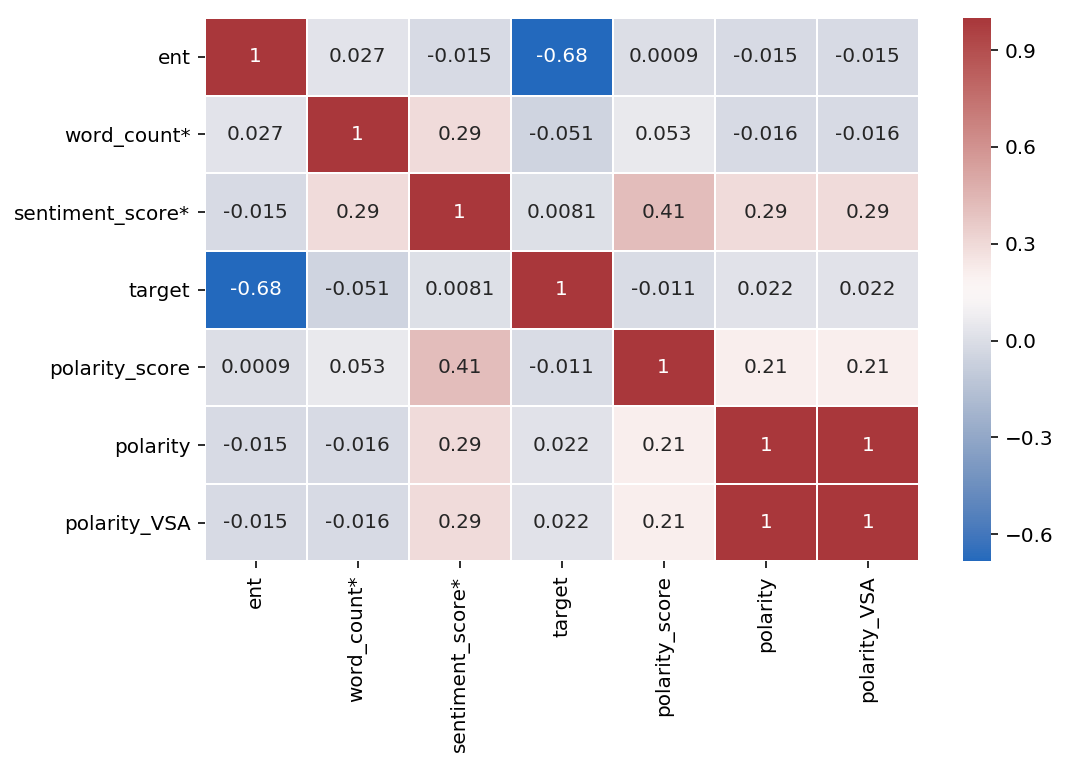

In [101]:
df_reddit_corr = df_reddit.corr()
plt.figure(figsize=(8,5))
sns.heatmap(df_reddit_corr, 
            xticklabels=df_reddit_corr.columns,
            yticklabels=df_reddit_corr.columns,
            cmap='vlag',
            annot=True,
            linewidth=0.5)
plt.savefig("../Figures/plot_03_19.png")

In [102]:
import collections
# counter=collections.Counter(corpus)
counter=collections.Counter(ent)
count=counter.most_common()

Visualize the entity frequencies

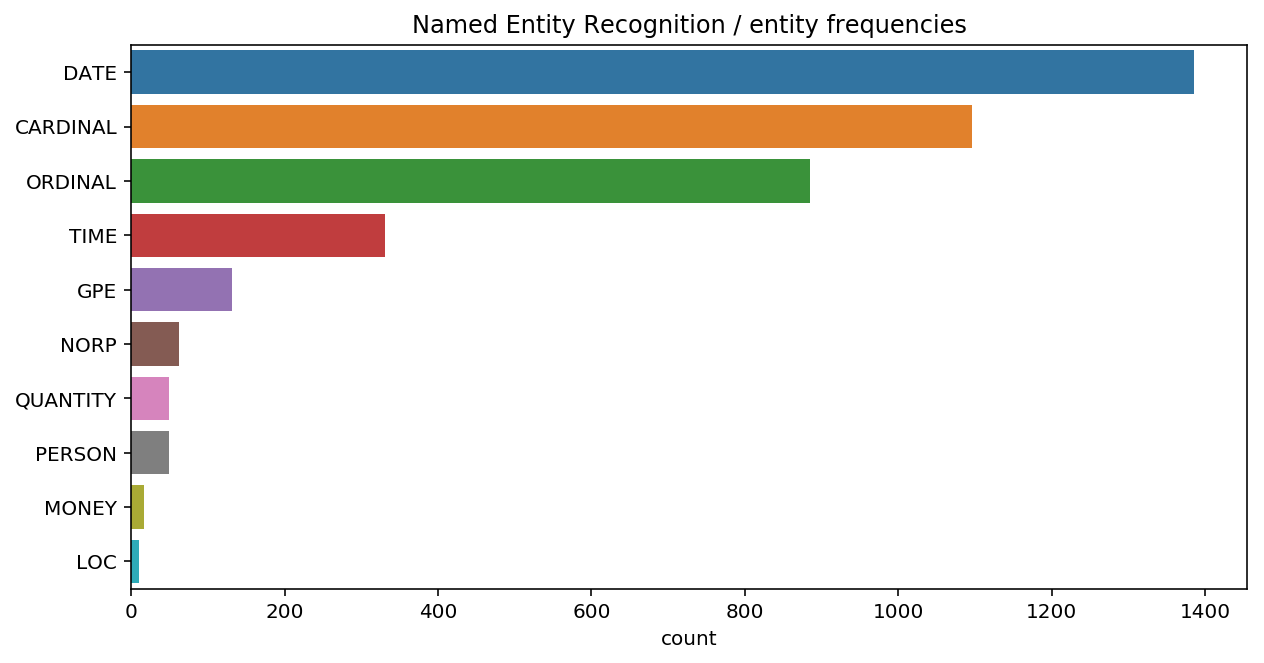

In [103]:
x,y=map(list,zip(*count))
plt.figure(figsize=(10,5))
sns.barplot(x=y,y=x)

plt.xlabel('count'); 
plt.title('Named Entity Recognition / entity frequencies')
plt.savefig("../Figures/plot_03_20.png")

In [104]:
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]
gpe=df_reddit['text_merged'].apply(lambda x: ner(x))
gpe=[i for x in gpe for i in x]

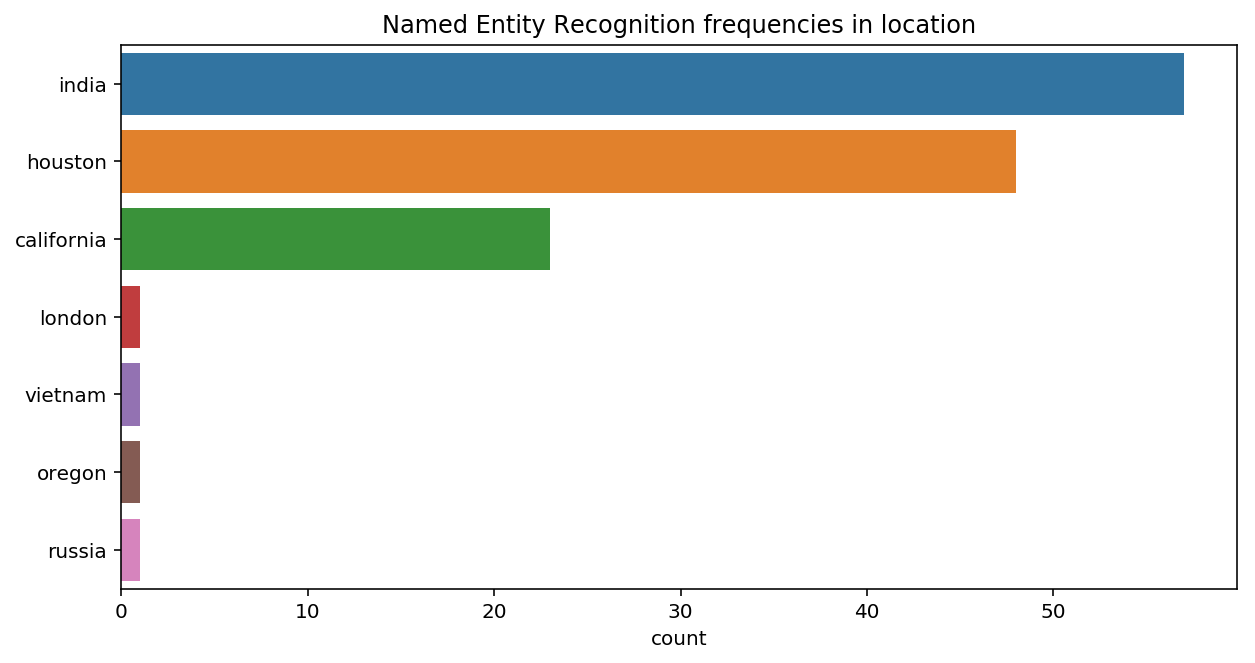

In [105]:
counter=collections.Counter(gpe)
x,y=map(list,zip(*counter.most_common(10)))
plt.figure(figsize=(10,5))
sns.barplot(y,x)

plt.xlabel('count'); 
plt.title('Named Entity Recognition frequencies in location')
plt.savefig("../Figures/plot_03_21.png")

In [106]:
per=df_reddit['text_merged'].apply(lambda x: ner(x,"PERSON"))
per=[i for x in per for i in x]
counter=collections.Counter(per)
x,y=map(list,zip(*counter.most_common(10)))

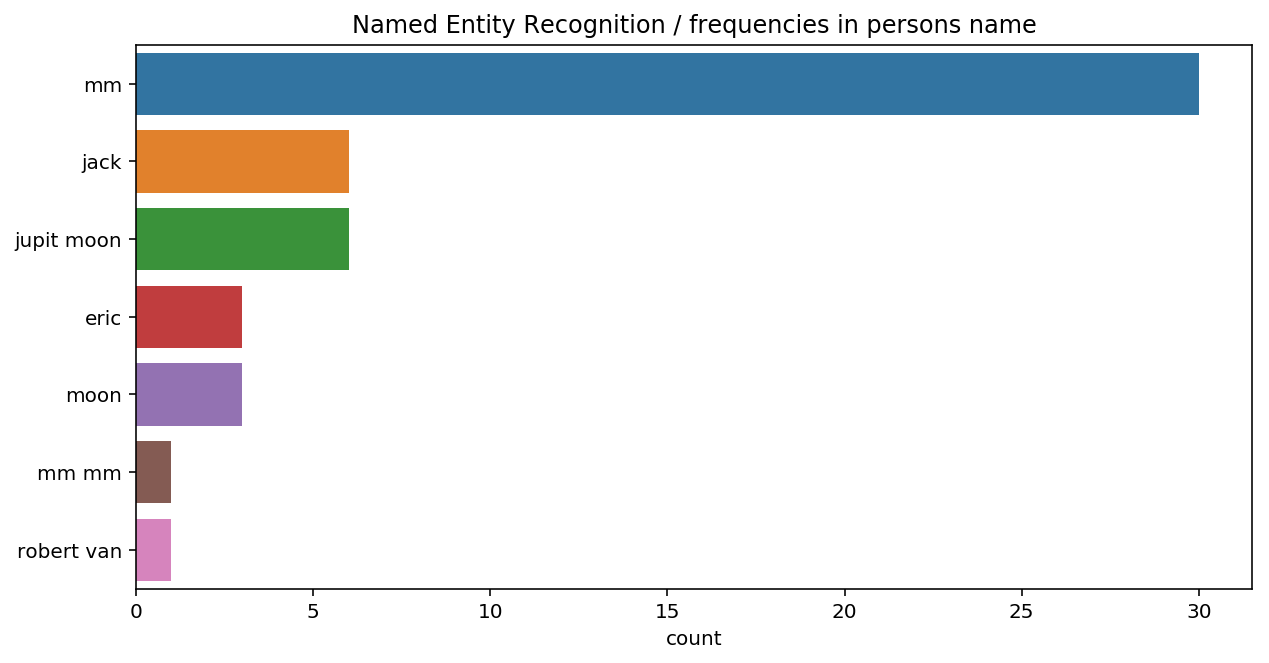

In [107]:
plt.figure(figsize=(10,5))
sns.barplot(y,x)

plt.xlabel('count'); 
plt.title('Named Entity Recognition / frequencies in persons name')
plt.savefig("../Figures/plot_03_22.png")

In [108]:
df_reddit.head()

,ent,text_merged,word_count*,sentiment_score*,target,polarity_score,polarity,polarity_VSA
0,1,star shine saturn ring,4,0.0000,1,0.0,1,1
1,2,smithsonian nation air space museum,5,0.0000,1,0.0,1,1
2,1,incred expand crab nebula,4,0.3182,1,0.0,1,1
3,1,columbia readi st,3,0.0000,1,0.0,1,1
4,1,went ksc christma got see made interest spacef...,8,0.4588,1,0.0,1,1


### Exploration through Parts of Speach Tagging in python

#### Example

In [109]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/amin/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [110]:
sentence="The greatest comeback stories in 2019"
tokens=word_tokenize(sentence)
nltk.pos_tag(tokens)

[('The', 'DT'),
 ('greatest', 'JJS'),
 ('comeback', 'NN'),
 ('stories', 'NNS'),
 ('in', 'IN'),
 ('2019', 'CD')]

In [111]:
doc = nlp('The greatest comeback stories in 2019')
displacy.render(doc, style='dep', 
                jupyter=True, 
                options={'distance': 90})

In [112]:
def Speech_tag(text):
    
    tokens=word_tokenize(text)
    tag = nltk.pos_tag(tokens)
    
    return tag

tags=df_reddit['text_merged'].apply(lambda x : Speech_tag(x))

In [113]:
# print(len(tags.iloc[0]))
# print(len(tags.iloc[11000]))

# print((tags.iloc[0]))
# print((tags.iloc[0][0]))
# print((tags.iloc[0][0][1]))

In [114]:
from collections import Counter
from itertools import chain

# import pandas as pd

from nltk import word_tokenize, pos_tag

# df = pd.read_csv('myfile.csv', delimiter=';')
# df.columns = ['sent', 'tag']

tok_and_tag = lambda x: pos_tag(word_tokenize(x))

df_reddit['lower_sent'] = df_reddit['text_merged'].apply(str.lower)
df_reddit['tagged_sent'] = df_reddit['lower_sent'].apply(tok_and_tag)

possible_tags = sorted(set(list(zip(*chain(*df_reddit['tagged_sent'])))[1]))

In [115]:
print(len(possible_tags))
print(possible_tags)

35
["''", 'CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'MD', 'NN', 'NNP', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']


In [116]:
df_reddit['tagged_sent'].head()

0    [(star, NN), (shine, NN), (saturn, NN), (ring,...
1    [(smithsonian, JJ), (nation, NN), (air, NN), (...
2    [(incred, JJ), (expand, NN), (crab, NN), (nebu...
3             [(columbia, NN), (readi, VBZ), (st, NN)]
4    [(went, VBD), (ksc, JJ), (christma, NN), (got,...
Name: tagged_sent, dtype: object

In [117]:
list(zip(*df_reddit['tagged_sent'][0]))[1]

('NN', 'NN', 'NN', 'NN')

In [118]:
Counter(list(zip(*df_reddit['tagged_sent'][11000]))[1])
# Counter(list(zip(*df_reddit['tagged_sent']))[1])

Counter({'NN': 21, 'RB': 6, 'IN': 1, 'JJ': 7, 'VBP': 1, 'VB': 1, 'VBD': 1})

In [119]:
df_reddit['tagged_sent'][349]

[]

In [120]:
# pos_counts = lambda x: Counter(list(zip(*x))[1])
# df_reddit['pos_counts'] = df_reddit['tagged_sent'].apply(pos_counts)

In [121]:
len(df_reddit['tagged_sent'])

12000

In [122]:
pos_counts = []
for i in range(0,len(df_reddit['tagged_sent'])):
    try:
#         print(i)
        pos_counts.append(Counter(list(zip(*df_reddit['tagged_sent'][i]))[1]))
    except:
#         pass
        pos_counts.append({'NN': 0})

In [123]:
pos_counts[0]

Counter({'NN': 4})

In [124]:
pos_counts[349]

{'NN': 0}

In [125]:
pos_counts = pd.DataFrame(pos_counts).fillna(0)
pos_counts.head()

,'',CC,CD,DT,EX,...,VBZ,WDT,WP,WP$,WRB
0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [126]:
pos_counts.insert(0, 'target',df_reddit['target'])
pos_counts.head(2)

,target,'',CC,CD,DT,...,VBZ,WDT,WP,WP$,WRB
0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0


In [127]:
# pos_counts.corr().T

In [ ]:
pos_counts_corr = pos_counts.corr()
plt.figure(figsize=(20,20))
sns.heatmap(pos_counts_corr, 
            xticklabels=pos_counts_corr.columns,
            yticklabels=pos_counts_corr.columns,
            cmap='vlag',
            annot=False,
            linewidth=0.2)
plt.savefig("../Figures/plot_03_23.png")

In [ ]:
pos_counts.describe().T.head()

In [ ]:
# def pos(text):
    
#     pos=nltk.pos_tag(word_tokenize(text))
#     pos=list(map(list,zip(*pos)))[1]
#     return pos

# tags=df_reddit['text_merged'].apply(lambda x : pos(x))
# tags=[x for l in tags for x in l]

# counter=collections.Counter(tags)
# x,y=list(map(list,zip(*counter.most_common(7))))
# plt.figure(figsize=(10,5))
# sns.barplot(x=y,y=x)

### Exploring through text complexity

In [ ]:
# !pip install textstat
# !/Users/amin/anaconda3/bin/python -m pip install textstat

In [ ]:
from textstat import flesch_reading_ease
import textstat
plt.figure(figsize=(12,6))

df_reddit['text_merged'].\
   apply(lambda x : flesch_reading_ease(x)).hist(bins=200, log=True)
plt.xlabel('text_complexity'); plt.ylabel('log-count')
plt.title('log scale')
plt.savefig("../Figures/plot_03_24.png")

In [ ]:
df_reddit['text_complexity'] = df_reddit['text_merged'].apply(lambda x : flesch_reading_ease(x))

In [ ]:
df_reddit.head()

In [ ]:
df_reddit['text_complexity'].describe().T

In [ ]:
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
df_reddit[sub_nasa_mask]['text_complexity'].hist(bins=200, log=False, alpha=0.5, label='sub_nasa_mask')
df_reddit[sub_space_mask]['text_complexity'].hist(bins=200, log=False, alpha=0.5, label='sub_space_mask')
plt.xlabel('text_complexity'); plt.ylabel('log-count')
plt.legend(loc='upper right'), plt.title('log scale')

plt.subplot(1, 2, 2)
df_reddit[sub_nasa_mask]['text_complexity'].hist(bins=200, log=True, alpha=0.5, label='sub_nasa_mask')
df_reddit[sub_space_mask]['text_complexity'].hist(bins=200, log=True, alpha=0.5, label='sub_space_mask')
plt.xlabel('text_complexity'); plt.ylabel('log-count')
plt.legend(loc='upper right'), plt.title('log scale')
plt.savefig("../Figures/plot_03_25.png")

In [ ]:
# x=[i for i in range(len(reading)) if reading[i]<5]
# df_reddit.iloc[x]['text_merged'].head()

In [ ]:
cols = ['ent', 'word_count*', 'sentiment_score*', 'polarity_score', 'polarity',
       'polarity_VSA', 'text_complexity']
EDA_df = df_reddit[cols]
EDA_df.head(2)

In [ ]:
EDA_all = pd.concat([pos_counts, EDA_df], axis=1)
EDA_all.head()

In [ ]:
# EDA_all.corr().T

In [ ]:
a = EDA_all.corr().T
a = pd.DataFrame(a)
plt.figure(figsize=(15,6))
plt.plot(a['target'])
plt.ylim(-0.7,.2)
plt.hlines(y=0, xmin=0, xmax=43,linestyles='solid')
plt.hlines(y=0.05, xmin=0, xmax=43,linestyles='dashdot')
plt.hlines(y=-0.05, xmin=0, xmax=43,linestyles='dashdot')
plt.xticks(rotation = 90)
plt.xlabel('EDA parameters')
plt.ylabel('Corrolation coffs')
plt.savefig("../Figures/plot_03_26.png")
plt.show()

In [ ]:
# vec1 = np.asarray(a['target'])
# sns = sns.heatmap([vec1])
# plt.show()

as it is seen in the above plot most parameters corrs are between -0.05 to 0.05 except for ent which shows a strong negative relationship with the target.

In [ ]:
EDA_all_corr = EDA_all.corr()
plt.figure(figsize=(20,20))
# cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
sns.heatmap(EDA_all_corr, 
            xticklabels=EDA_all_corr.columns,
            yticklabels=EDA_all_corr.columns,
            cmap='vlag',
            annot=False,
            linewidth=0.2)
# sns.color_palette("vlag", as_cmap=True)
plt.savefig("../Figures/plot_03_27.png")

In [ ]:
pickle.dump(df_reddit, open('../DataSet/df_reddit_for_model.pkl', 'wb'))
pickle.dump(EDA_all, open('../DataSet/EDA_all_for_model.pkl', 'wb'))